<a href="https://colab.research.google.com/github/Rusty-Thunderbird/Transition-matrices-for-computing-Expected-Credit-Loss-and-Stress-Testing/blob/main/Transition_matrices_for_computing_Expected_Credit_Loss_and_Stress_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Team Members
<table style="width: 90%; border-collapse: collapse; border: 4px solid black; text-align: center; margin: auto;">
  <tr style="background-color: #f2f2f2; font-weight: bold; border: 2px solid black;">
    <th style="border: 2px solid black; padding: 10px; text-align: center;"><font size="5">Name</font></th>

  </tr>

  <tr>
    <td style="border: 2px solid black; padding: 10px;"><font size="5"><b>CHINMAY MANDAVE</b></font></td>

  </tr>

  <tr>
    <td style="border: 2px solid black; padding: 10px;"><font size="5"><b>ROHAN REDDY DEVARAPALLI</b></font></td>

  </tr>

  <tr>
    <td style="border: 2px solid black; padding: 10px;"><font size="5"><b>AAVULA KAARTAVARAYA YADAV</b></font></td>

  </tr>

  <tr>
    <td style="border: 2px solid black; padding: 10px;"><font size="5"><b>VIGNESH S</b></font></td>

  </tr>
</table>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("data.xlsx")
df.head()

,BorrowerNumber,Year_1_Set,Year_2_Set,Year_3_Set,Year_4_Set,Year_5_Set,Year_6_Set,Year_7_Set,Year_8_Set,Year_9_Set,...,Year_1_EAD,Year_2_EAD,Year_3_EAD,Year_4_EAD,Year_5_EAD,Year_6_EAD,Year_7_EAD,Year_8_EAD,Year_9_EAD,Year_10_EAD
0,1,1,2,7,3,4,3,7,4,1,...,1.122561,1.803716,1.792492,1.557990,1.005128,1.334708,1.984195,1.437484,1.608625,1.779199
1,2,3,5,2,1,6,4,6,2,2,...,1.602930,1.049605,1.732616,1.052256,1.811495,1.646908,1.093904,1.529989,1.765153,1.747784
2,3,3,2,1,3,7,8,8,1,3,...,1.493346,1.689958,1.218906,1.436757,1.700422,1.762899,1.716529,1.733943,1.539448,1.527447
3,4,3,2,1,1,6,5,8,4,6,...,1.940305,1.112486,1.663977,1.323433,1.385452,1.021189,1.180308,1.601662,1.038581,1.573149
4,5,5,1,7,3,6,4,8,3,6,...,1.839918,1.054109,1.020536,1.095145,1.719865,1.129479,1.233083,1.362481,1.050268,1.692962


In [ ]:
ratings_df = df[[f"Year_{i}_Ratings" for i in range(1, 11)]].copy()
amount_df  = df[[f"Year_{i}_Amount"  for i in range(1, 11)]].copy()
lgd_df     = df[[f"Year_{i}_LGD"     for i in range(1, 11)]].copy()
ead_df     = df[[f"Year_{i}_EAD"     for i in range(1, 11)]].copy()

#SECTION 1 :-

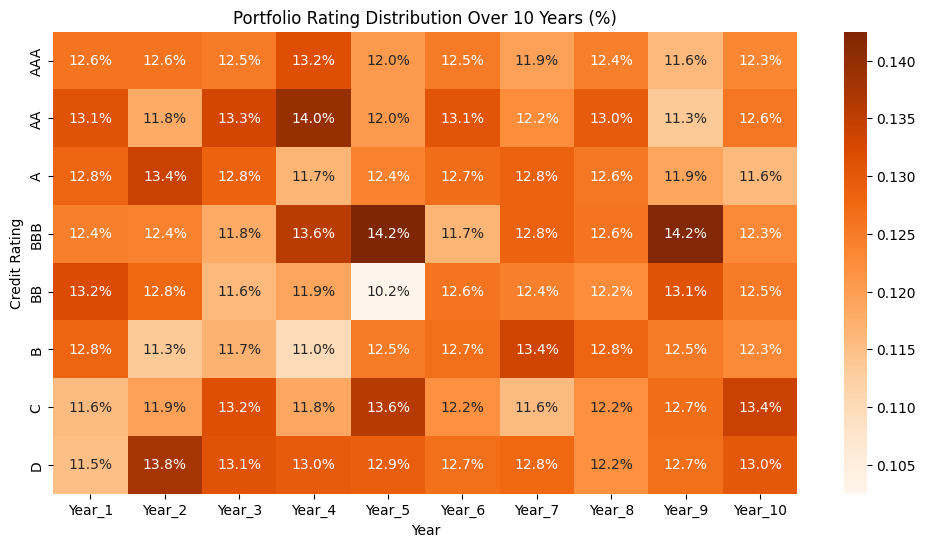

In [ ]:

rating_order = ["AAA", "AA", "A", "BBB", "BB", "B", "C", "D"]

rating_counts = pd.DataFrame({
    f"Year_{i}": ratings_df[f"Year_{i}_Ratings"].value_counts(normalize=True)
    for i in range(1, 11)
}).fillna(0).T

rating_counts = rating_counts[rating_order]

plt.figure(figsize=(12,6))
sns.heatmap(rating_counts.T, annot=True, fmt=".1%", cmap="Oranges")
plt.title("Portfolio Rating Distribution Over 10 Years (%)")
plt.xlabel("Year")
plt.ylabel("Credit Rating")
plt.show()

<Figure size 1200x600 with 0 Axes>

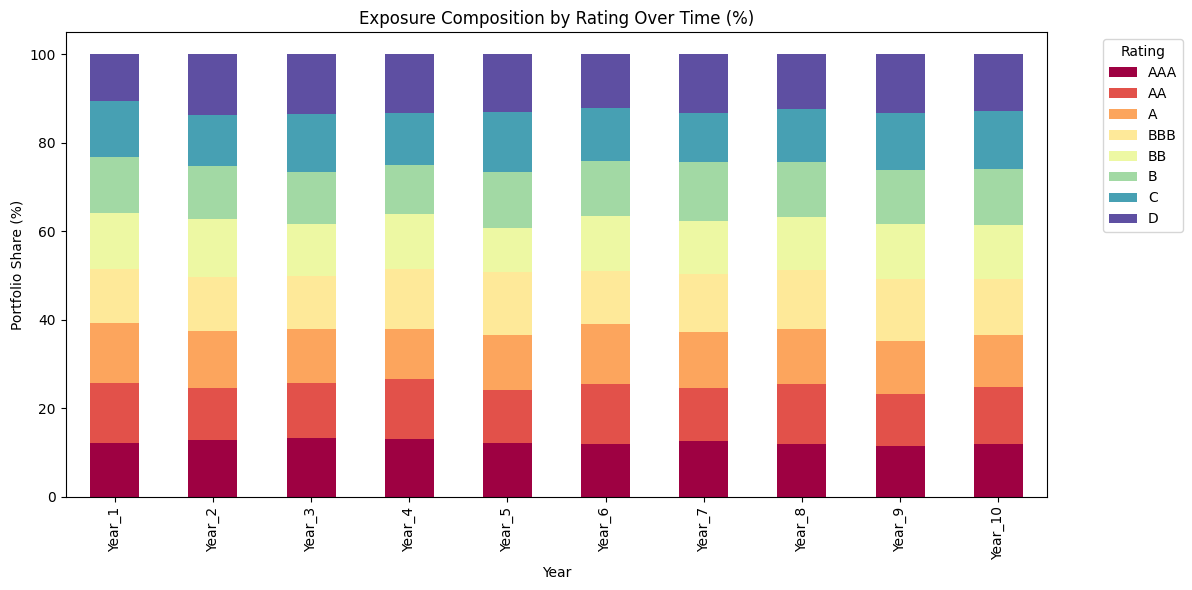

In [ ]:

rating_order = ["AAA", "AA", "A", "BBB", "BB", "B", "C", "D"]

exposure_share = pd.DataFrame({
    f"Year_{i}": amount_df[f"Year_{i}_Amount"]
                    .groupby(ratings_df[f"Year_{i}_Ratings"]).sum()
    for i in range(1, 11)
}).fillna(0)

exposure_share = exposure_share.reindex(rating_order).fillna(0)
exposure_share = exposure_share.div(exposure_share.sum(axis=0), axis=1) * 100

plt.figure(figsize=(12,6))
exposure_share.T.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(12,6))

plt.title("Exposure Composition by Rating Over Time (%)")
plt.xlabel("Year")
plt.ylabel("Portfolio Share (%)")
plt.legend(title="Rating", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)

print("Matplotlib style reset to default.")

Matplotlib style reset to default.


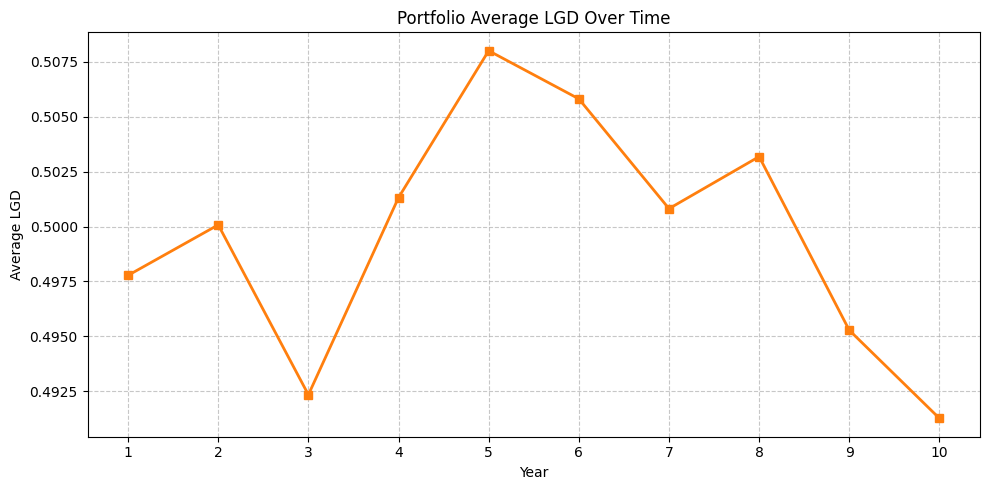

In [ ]:
import matplotlib.pyplot as plt

years = range(1, 11)

portfolio_avg_lgd = []
for i in range(1, 11):
    portfolio_avg_lgd.append(lgd_df[f"Year_{i}_LGD"].mean())

plt.figure(figsize=(10,5))
plt.plot(years, portfolio_avg_lgd, color='tab:orange', marker='s', linewidth=2, label='Average LGD')
plt.title("Portfolio Average LGD Over Time")
plt.xlabel("Year")
plt.ylabel("Average LGD")
plt.xticks(years)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

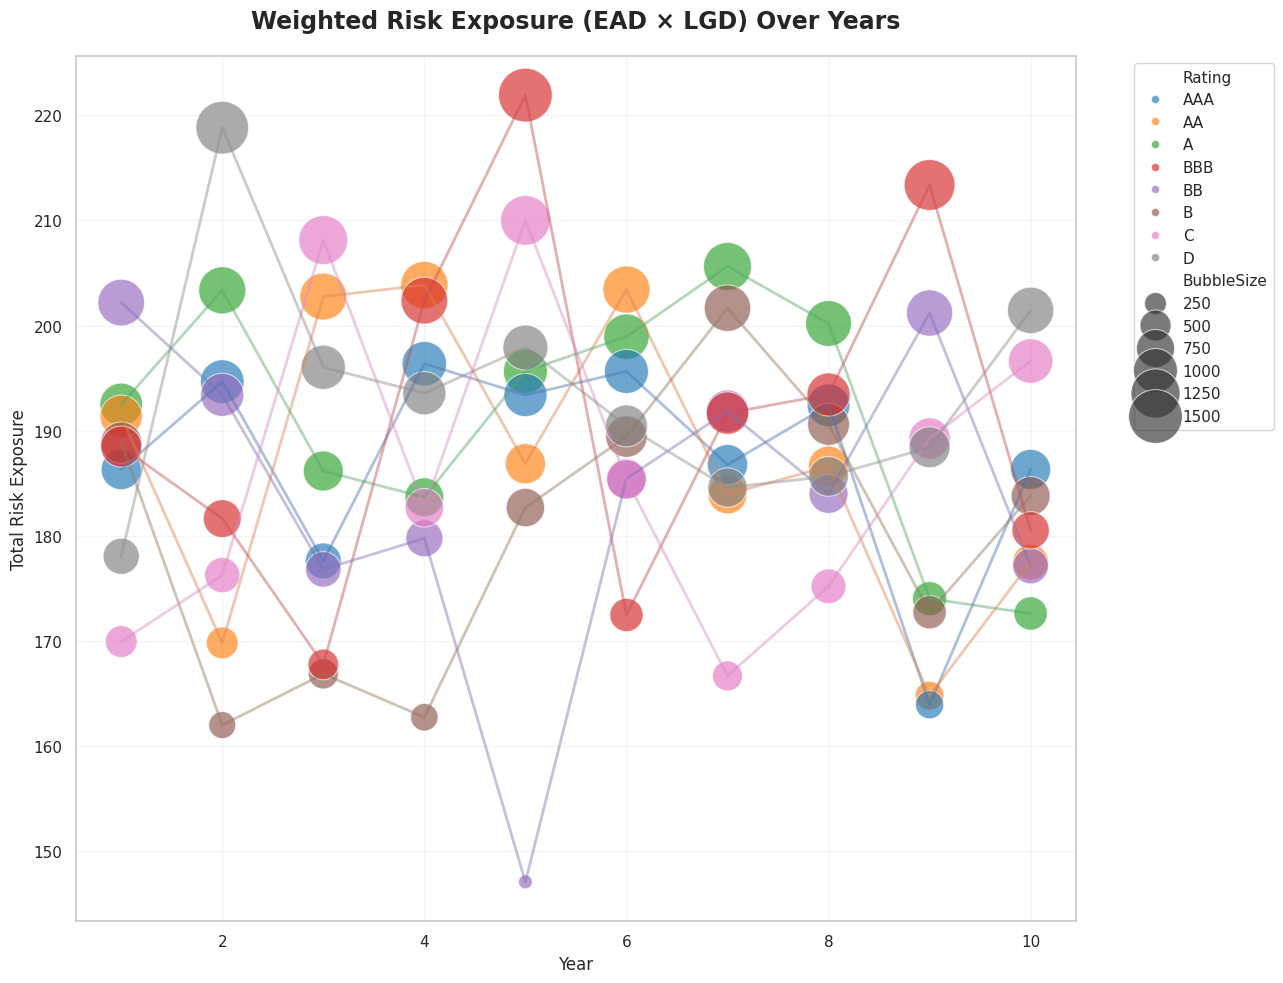

In [ ]:
risk_data = []
for i in range(1, 11):
    rating = ratings_df[f"Year_{i}_Ratings"]
    ead = ead_df[f"Year_{i}_EAD"]
    lgd = lgd_df[f"Year_{i}_LGD"]

    df_year = pd.DataFrame({"Rating": rating, "EAD": ead, "LGD": lgd})
    df_year["Risk"] = df_year["EAD"] * df_year["LGD"]

    risk_summary = df_year.groupby("Rating")["Risk"].sum().reset_index()
    risk_summary["Year"] = i
    risk_data.append(risk_summary)

risk_df = pd.concat(risk_data)


rating_order = ["AAA", "AA", "A", "BBB", "BB", "B", "C", "D"]
risk_df["Rating"] = pd.Categorical(risk_df["Rating"], categories=rating_order, ordered=True)

min_size, max_size = 100, 1500
risk_norm = (risk_df["Risk"] - risk_df["Risk"].min()) / (risk_df["Risk"].max() - risk_df["Risk"].min())
risk_df["BubbleSize"] = risk_norm * (max_size - min_size) + min_size

plt.figure(figsize=(13, 10))
sns.set(style="whitegrid")

sns.scatterplot(
    data=risk_df,
    x="Year",
    y="Risk",
    hue="Rating",
    size="BubbleSize",
    sizes=(100, 1500),
    alpha=0.65,
    palette="tab10",
    legend="brief",
    edgecolor="white",
    linewidth=0.8
)
sns.set_style("whitegrid")
plt.grid(alpha=0.2)


for rating in rating_order:
    sub = risk_df[risk_df["Rating"] == rating]
    plt.plot(sub["Year"], sub["Risk"], alpha=0.45, linewidth=2)


plt.title("Weighted Risk Exposure (EAD × LGD) Over Years",
          fontsize=17, fontweight='bold', pad=20)
plt.xlabel("Year")
plt.ylabel("Total Risk Exposure")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

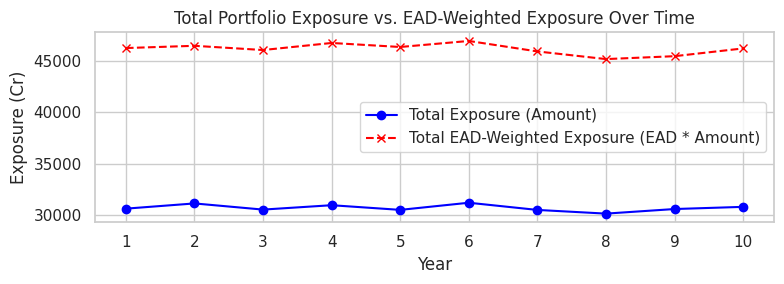

In [ ]:
amount_cols = [f"Year_{i}_Amount" for i in range(1,11)]
ead_cols    = [f"Year_{i}_EAD" for i in range(1,11)]

total_exposure = [amount_df[c].sum() for c in amount_cols]

ead_amount_exposure = []
for i in range(1, 11):
    col_amt = f"Year_{i}_Amount"
    col_ead = f"Year_{i}_EAD"
    ead_amount_exposure.append((amount_df[col_amt] * ead_df[col_ead]).sum())

plt.figure(figsize=(8,3))
plt.plot(range(1,11), total_exposure, marker="o", label="Total Exposure (Amount)", color='blue')
plt.plot(range(1,11), ead_amount_exposure, marker="x", linestyle='--', label="Total EAD-Weighted Exposure (EAD * Amount)", color='red')
plt.xticks(range(1,11))
plt.title("Total Portfolio Exposure vs. EAD-Weighted Exposure Over Time")
plt.xlabel("Year")
plt.ylabel("Exposure (Cr)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

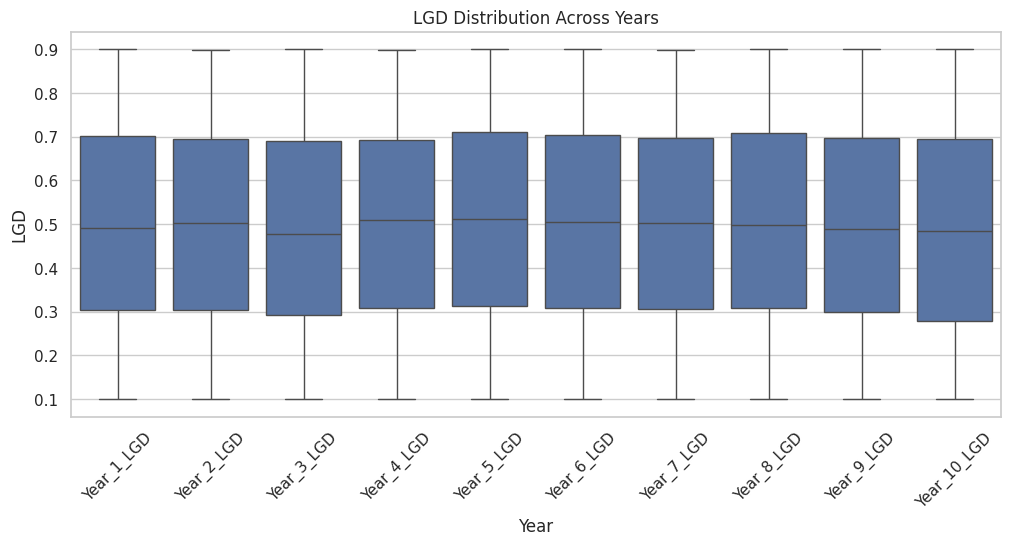

In [ ]:
lgd_df_melt = lgd_df.melt(var_name="Year", value_name="LGD")

plt.figure(figsize=(12,5))
sns.boxplot(data=lgd_df_melt, x="Year", y="LGD")
plt.xticks(rotation=45)
plt.title("LGD Distribution Across Years")
plt.ylabel("LGD")
plt.show()


#SECTION 2 :-

In [ ]:
ratings = ["AAA", "AA", "A", "BBB", "BB", "B", "C", "D"]

##2a) Transtition Matrix

In [ ]:
def transition_matrix(rating_df, year_from, year_to, ratings):
    trans_counts = pd.DataFrame(0, index=ratings, columns=ratings)
    for _, row in rating_df.iterrows():
        r1, r2 = row[year_from], row[year_to]
        if pd.notna(r1) and pd.notna(r2) and r1 in ratings and r2 in ratings:
            trans_counts.loc[r1, r2] += 1

    trans_probs = trans_counts.div(trans_counts.sum(axis=1), axis=0).fillna(0)
    return trans_counts, trans_probs

In [ ]:
transition_results = {}
for i in range(1, 10):
    from_col = f"Year_{i}_Ratings"
    to_col   = f"Year_{i+1}_Ratings"
    counts, probs = transition_matrix(ratings_df, from_col, to_col, ratings)
    transition_results[f"Year {i+1}"] = {"count": counts, "prob": probs}

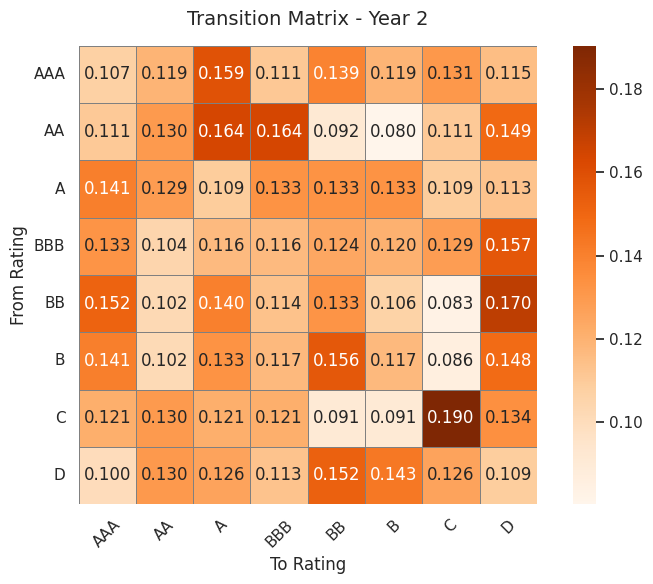

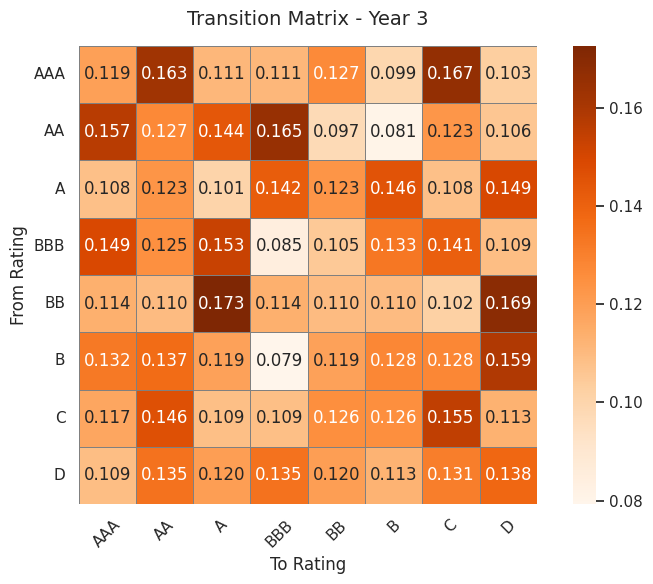

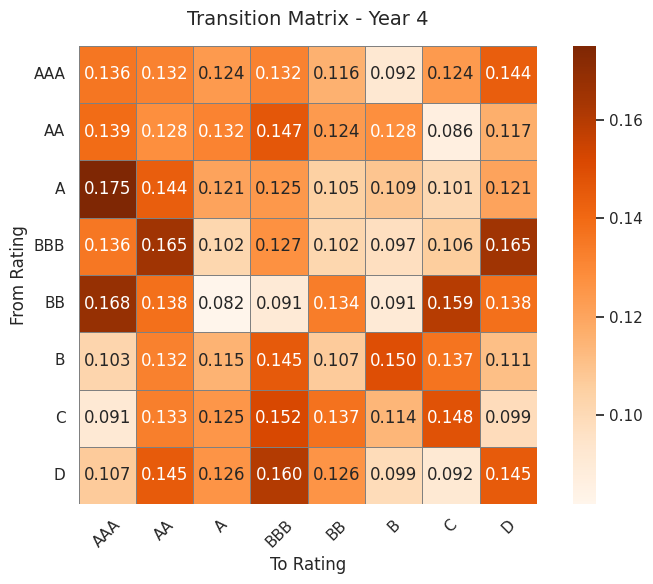

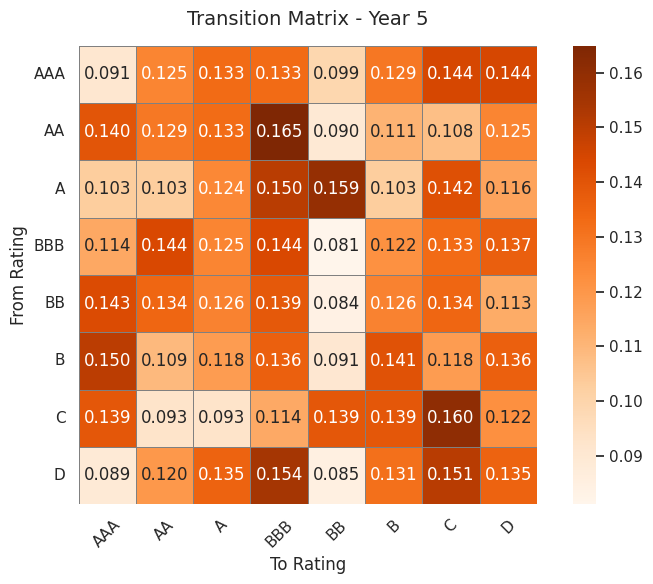

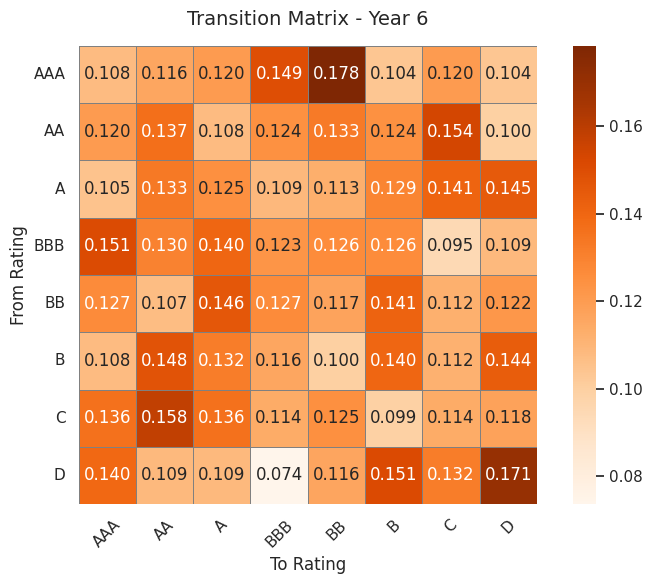

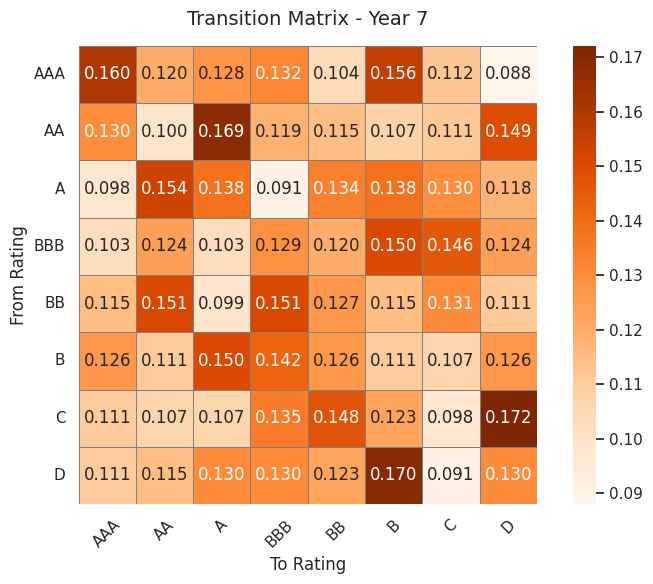

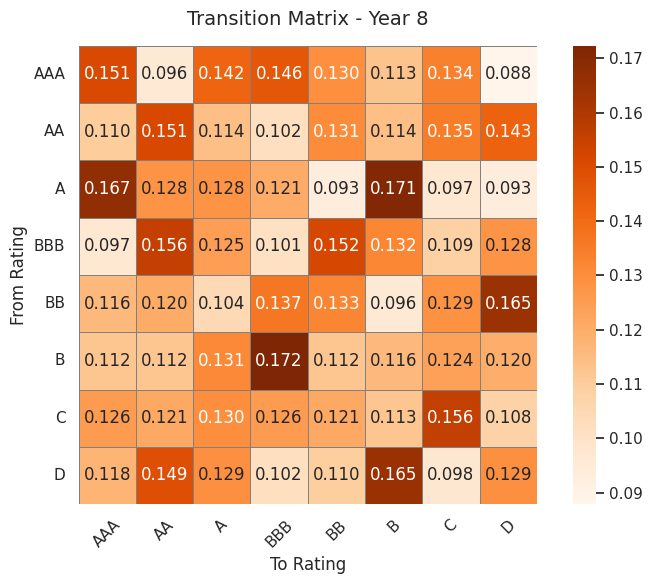

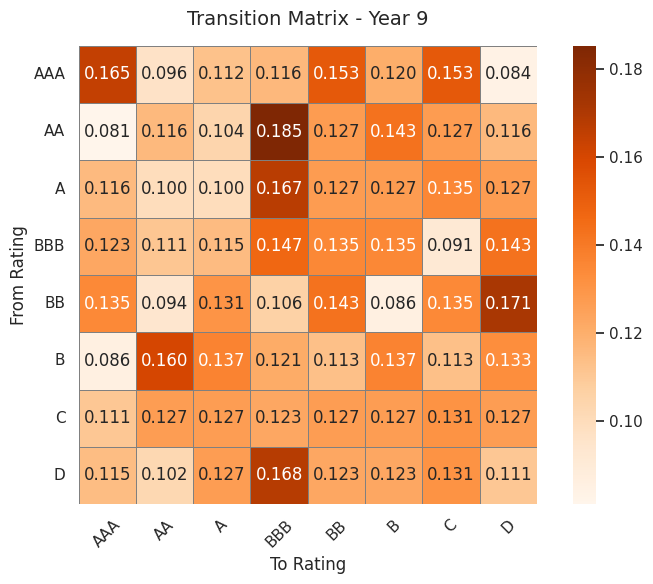

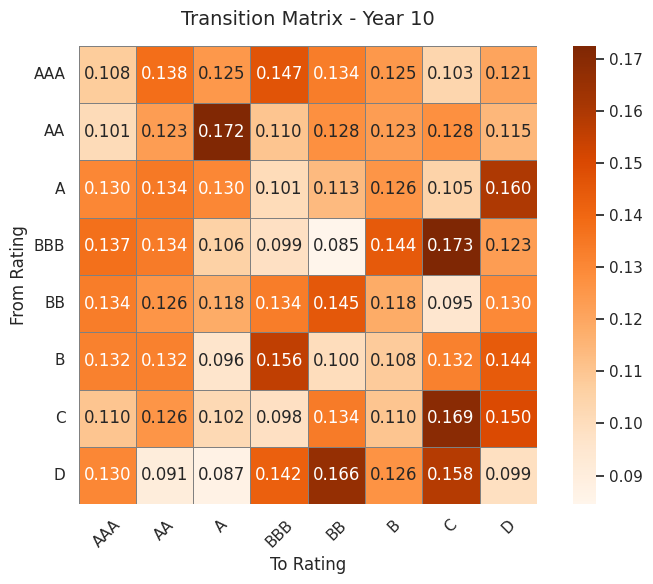

In [ ]:
# @title
for year, mats in transition_results.items():
    prob_matrix = mats["prob"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(prob_matrix, annot=True, fmt=".3f", cmap="Oranges", cbar=True,
                linewidths=0.5, linecolor='gray', square=True,
                xticklabels=prob_matrix.columns, yticklabels=prob_matrix.index)

    plt.title(f"Transition Matrix - {year}", fontsize=14, pad=15)
    plt.xlabel("To Rating", fontsize=12)
    plt.ylabel("From Rating", fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

##2b) Estimated PD for each rating category and Portfolio PD

In [ ]:
default_label = "D"
pd_results = {}

for i in range(1, 10):
    year_label = f"Year {i+1}"
    prob_matrix = transition_results[year_label]["prob"]

    pd_per_rating = prob_matrix[default_label].copy()

    from_col = f"Year_{i}_Ratings"
    exposures = amount_df[f"Year_{i}_Amount"]
    grouped = exposures.groupby(ratings_df[from_col]).sum()
    weights = grouped / grouped.sum()
    weights = weights.reindex(ratings).fillna(0)
    portfolio_pd = (weights * pd_per_rating).sum()


    pd_results[year_label] = {
        "pd_per_rating": pd_per_rating,
        "portfolio_pd": portfolio_pd
    }

In [ ]:
for year, vals in pd_results.items():
    print(f"\n===== {year} =====")
    print("PD per rating category:")
    display(vals["pd_per_rating"].to_frame("PD").style.format("{:.4f}"))
    print(f"Portfolio PD: {vals['portfolio_pd']:.4f}")


===== Year 2 =====
PD per rating category:


,PD
AAA,0.1151
AA,0.1489
A,0.1133
BBB,0.1566
BB,0.1705
B,0.1484
C,0.1342
D,0.1087


Portfolio PD: 0.1375

===== Year 3 =====
PD per rating category:


,PD
AAA,0.1032
AA,0.1059
A,0.1493
BBB,0.1089
BB,0.1686
B,0.1586
C,0.1130
D,0.1382


Portfolio PD: 0.1312

===== Year 4 =====
PD per rating category:


,PD
AAA,0.1440
AA,0.1165
A,0.1206
BBB,0.1653
BB,0.1379
B,0.1111
C,0.0989
D,0.1450


Portfolio PD: 0.1299

===== Year 5 =====
PD per rating category:


,PD
AAA,0.1445
AA,0.1254
A,0.1159
BBB,0.1365
BB,0.1134
B,0.1364
C,0.1224
D,0.1351


Portfolio PD: 0.1289

===== Year 6 =====
PD per rating category:


,PD
AAA,0.1037
AA,0.0996
A,0.1452
BBB,0.1088
BB,0.1220
B,0.1440
C,0.1176
D,0.1705


Portfolio PD: 0.1266

===== Year 7 =====
PD per rating category:


,PD
AAA,0.0880
AA,0.1494
A,0.1181
BBB,0.1245
BB,0.1111
B,0.1265
C,0.1721
D,0.1304


Portfolio PD: 0.1276

===== Year 8 =====
PD per rating category:


,PD
AAA,0.0879
AA,0.1429
A,0.0934
BBB,0.1284
BB,0.1647
B,0.1199
C,0.1082
D,0.1294


Portfolio PD: 0.1217

===== Year 9 =====
PD per rating category:


,PD
AAA,0.0843
AA,0.1158
A,0.1275
BBB,0.1429
BB,0.1714
B,0.1328
C,0.1270
D,0.1107


Portfolio PD: 0.1266

===== Year 10 =====
PD per rating category:


,PD
AAA,0.1207
AA,0.1145
A,0.1597
BBB,0.1232
BB,0.1298
B,0.1440
C,0.1496
D,0.0988


Portfolio PD: 0.1298


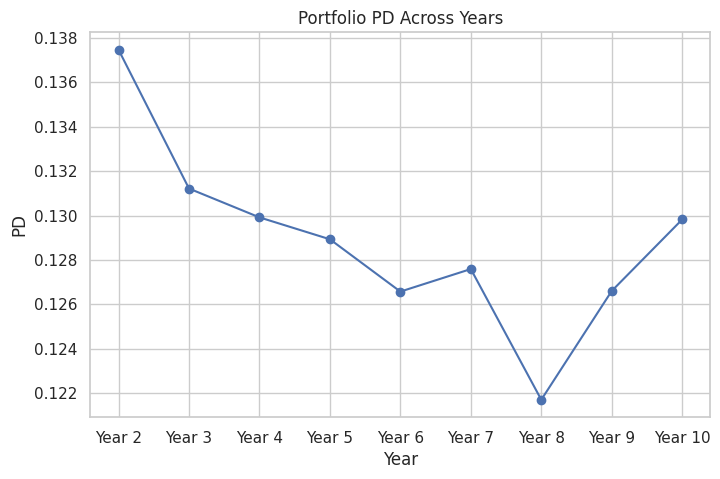

In [ ]:
# @title
# Plot portfolio PD across years
portfolio_pds = {year: vals["portfolio_pd"] for year, vals in pd_results.items()}
plt.figure(figsize=(8,5))
plt.plot(portfolio_pds.keys(), portfolio_pds.values(), marker='o')
plt.title("Portfolio PD Across Years")
plt.ylabel("PD")
plt.xlabel("Year")
plt.grid(True)
plt.show()

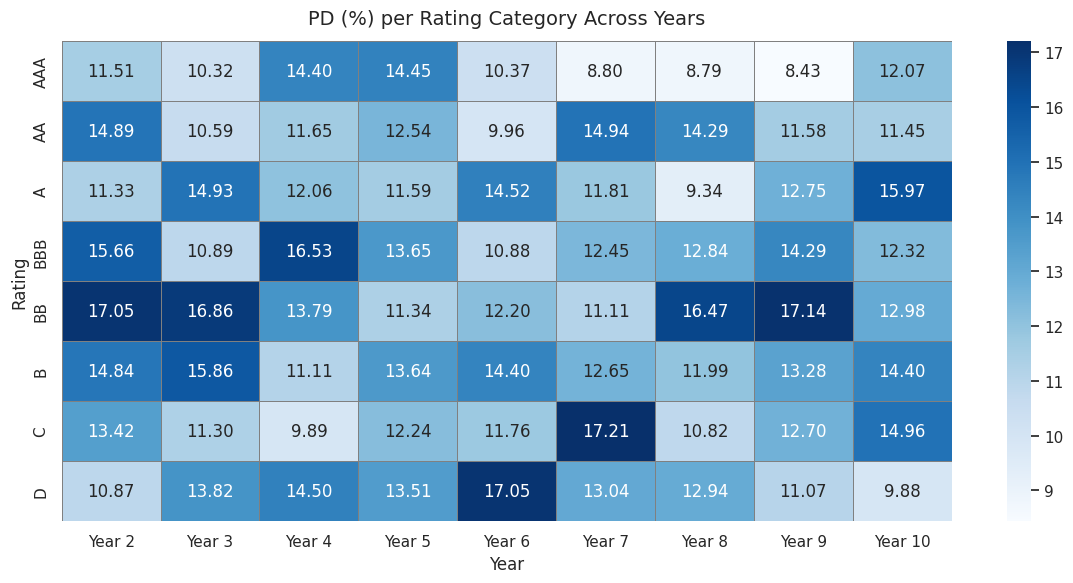

In [ ]:
# @title
pd_matrix = pd.DataFrame({
    year: vals["pd_per_rating"] for year, vals in pd_results.items()
}).T

plt.figure(figsize=(12, 6))
sns.heatmap(pd_matrix.T * 100, annot=True, fmt=".2f", cmap="Blues",
            linewidths=0.5, linecolor='gray')

plt.title("PD (%) per Rating Category Across Years", fontsize=14, pad=12)
plt.xlabel("Year")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

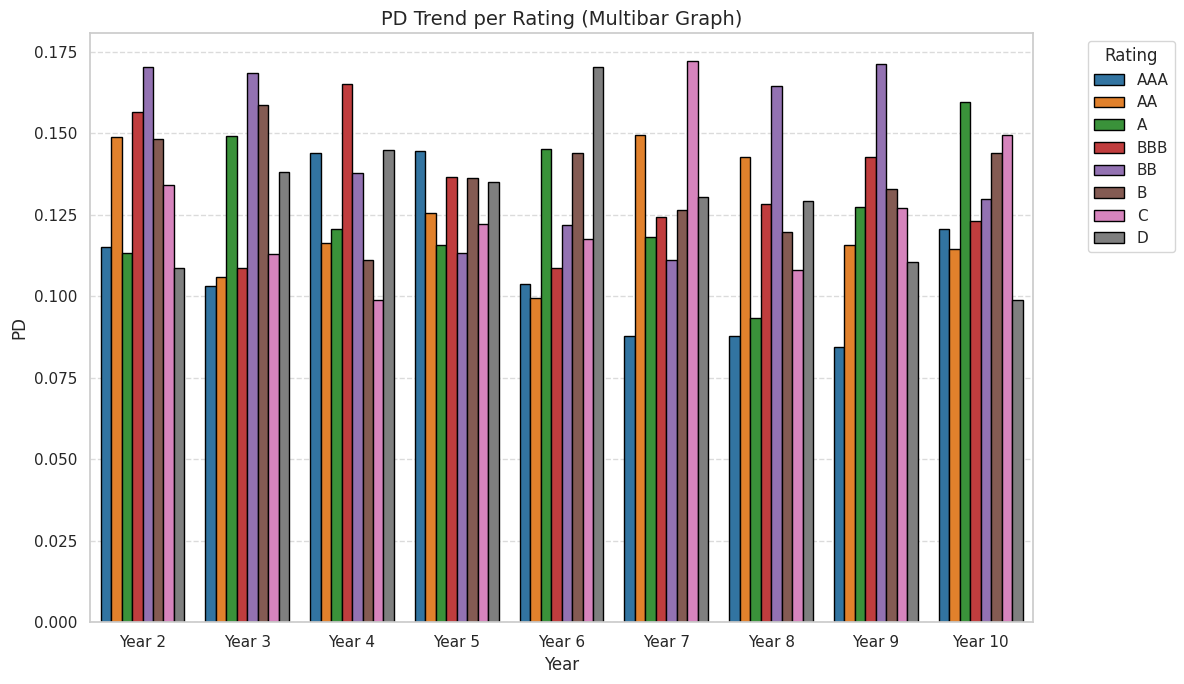

In [ ]:
pd_matrix = pd.DataFrame({
    year: vals["pd_per_rating"] for year, vals in pd_results.items()
}).T
pd_matrix_melted = pd_matrix.reset_index().melt(id_vars='index', var_name='Rating', value_name='PD')
pd_matrix_melted = pd_matrix_melted.rename(columns={'index': 'Year'})

plt.figure(figsize=(12, 7))
sns.barplot(
    data=pd_matrix_melted,
    x='Year',
    y='PD',
    hue='Rating',
    palette='tab10',
    edgecolor='black'
)

plt.title("PD Trend per Rating (Multibar Graph)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("PD")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

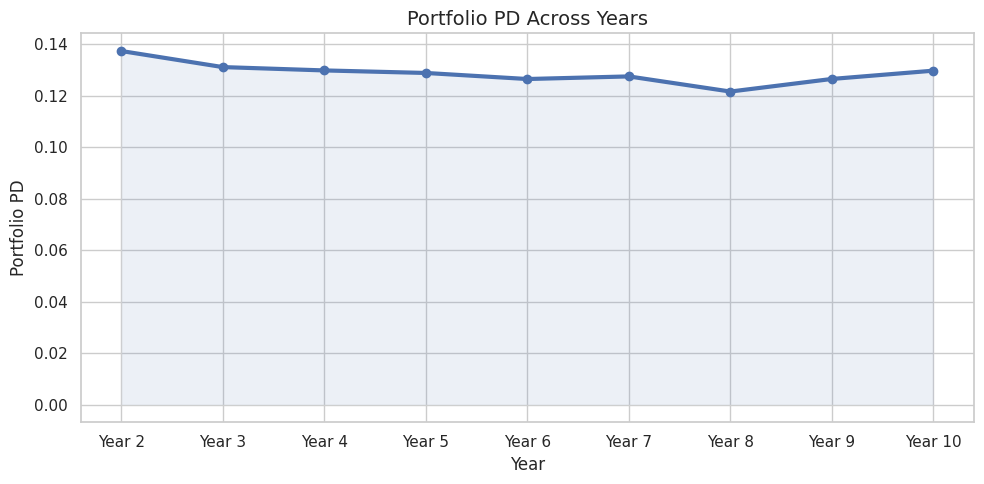

In [ ]:
years = list(portfolio_pds.keys())
values = list(portfolio_pds.values())

plt.figure(figsize=(10, 5))
plt.plot(years, values, marker='o', linewidth=3)
plt.fill_between(years, values, alpha=0.1)

plt.title("Portfolio PD Across Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Portfolio PD")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2c) Estimated EL for each rating category and Portfolio EL

In [ ]:
el_results = {}

for i in range(1, 10):

    year_label = f"Year {i+1}"
    col_rating = f"Year_{i}_Ratings"
    col_lgd_next = f"Year_{i+1}_LGD"
    col_ead_next = f"Year_{i+1}_EAD"
    col_amt_next = f"Year_{i+1}_Amount"

    pd_per_rating = pd_results[year_label]["pd_per_rating"]
    borrower_pd = ratings_df[col_rating].map(pd_per_rating).fillna(0)
    ead_value = amount_df[col_amt_next] * ead_df[col_ead_next]
    borrower_el = borrower_pd * lgd_df[col_lgd_next] * ead_value

    el_per_rating = (
        borrower_el.groupby(ratings_df[col_rating])
                   .sum()
                   .reindex(ratings)
                   .fillna(0)
    )

    portfolio_el = borrower_el.sum()

    el_results[year_label] = {
        "el_per_rating": el_per_rating,
        "portfolio_el": portfolio_el
    }

In [ ]:
for year, vals in el_results.items():
    print(f"\n===== {year} =====")
    print("Expected Loss per rating (in crores):")
    display(vals["el_per_rating"].to_frame("EL (Cr)").style.format("{:,.3f}"))
    print(f"Portfolio Expected Loss: {vals['portfolio_el']:.3f} Cr")


===== Year 2 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_1_Ratings,
AAA,361.476
AA,440.715
A,352.267
BBB,456.535
BB,531.835
B,410.444
C,345.241
D,298.479


Portfolio Expected Loss: 3196.992 Cr

===== Year 3 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_2_Ratings,
AAA,323.296
AA,291.169
A,453.488
BBB,297.941
BB,488.830
B,405.277
C,312.810
D,419.182


Portfolio Expected Loss: 2991.992 Cr

===== Year 4 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_3_Ratings,
AAA,445.544
AA,334.898
A,338.807
BBB,452.947
BB,390.098
B,332.106
C,332.267
D,430.955


Portfolio Expected Loss: 3057.622 Cr

===== Year 5 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_4_Ratings,
AAA,427.015
AA,410.271
A,311.923
BBB,468.232
BB,303.936
B,354.459
C,349.330
D,411.297


Portfolio Expected Loss: 3036.465 Cr

===== Year 6 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_5_Ratings,
AAA,302.832
AA,284.014
A,423.598
BBB,368.340
BB,313.300
B,431.675
C,369.881
D,527.109


Portfolio Expected Loss: 3020.749 Cr

===== Year 7 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_6_Ratings,
AAA,264.487
AA,455.056
A,328.459
BBB,346.120
BB,326.350
B,357.234
C,478.495
D,418.534


Portfolio Expected Loss: 2974.734 Cr

===== Year 8 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_7_Ratings,
AAA,247.366
AA,370.083
A,277.763
BBB,378.846
BB,471.962
B,355.630
C,302.308
D,369.204


Portfolio Expected Loss: 2773.163 Cr

===== Year 9 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_8_Ratings,
AAA,248.242
AA,351.412
A,379.059
BBB,427.982
BB,467.617
B,357.129
C,357.086
D,286.120


Portfolio Expected Loss: 2874.646 Cr

===== Year 10 =====
Expected Loss per rating (in crores):


,EL (Cr)
Year_9_Ratings,
AAA,325.514
AA,315.299
A,428.750
BBB,404.539
BB,408.813
B,387.718
C,396.473
D,297.945


Portfolio Expected Loss: 2965.050 Cr


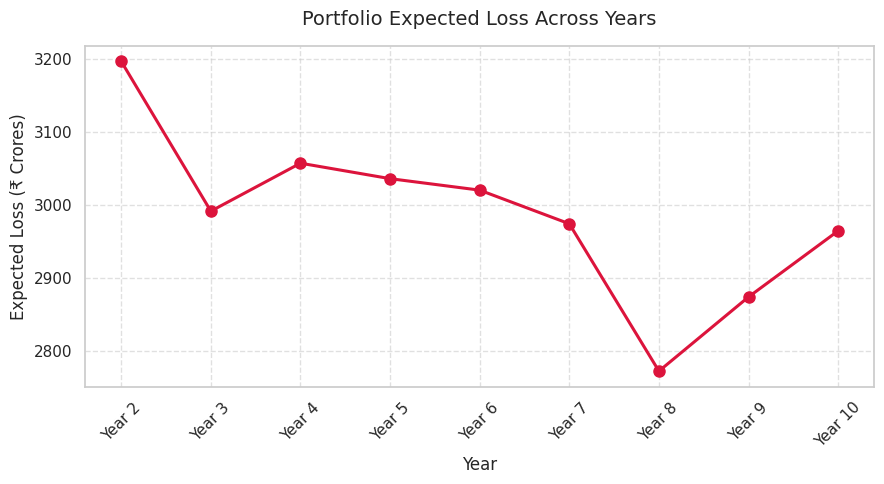

In [ ]:
portfolio_els = {year: vals["portfolio_el"] for year, vals in el_results.items()}
plt.figure(figsize=(9, 5))
plt.plot(list(portfolio_els.keys()), list(portfolio_els.values()),marker='o', color='crimson', linewidth=2.2, markersize=8)
plt.title("Portfolio Expected Loss Across Years", fontsize=14, pad=15)
plt.ylabel("Expected Loss (₹ Crores)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
el_df = pd.DataFrame({
    year: vals["el_per_rating"]
    for year, vals in el_results.items()
}).T

el_df.index.name = "Year"
el_df.columns.name = "Rating"

el_df.index = el_df.index.str.replace("Year ", "").astype(int)

In [ ]:
def set_glassmorphic():
    plt.style.use('default')
    plt.rcParams['figure.facecolor'] = (1,1,1,0)
    plt.rcParams['axes.facecolor'] = (1,1,1,0.60)
    plt.rcParams['axes.edgecolor'] = (0.3,0.3,0.3,0.4)
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = (0.7,0.7,0.7,0.3)
    plt.rcParams['axes.titleweight'] = 'bold'

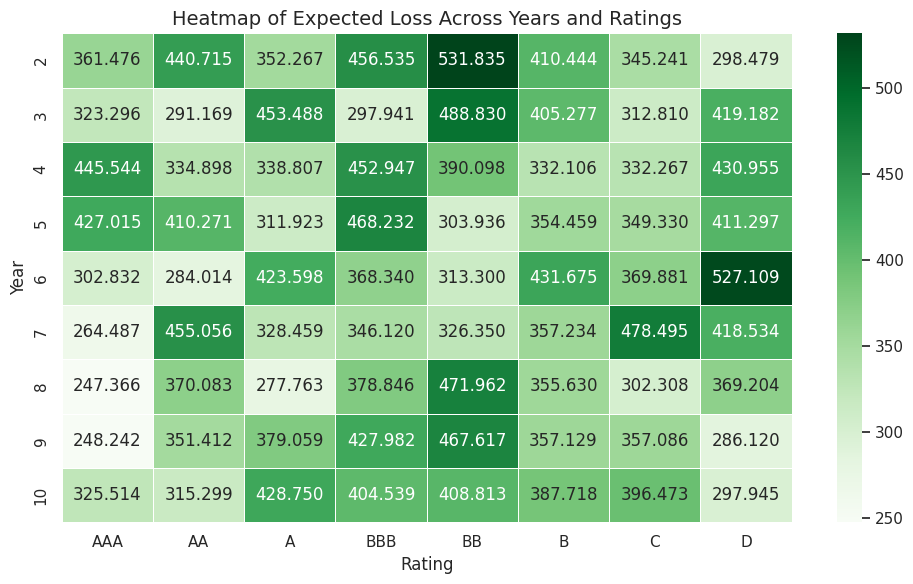

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(el_df, annot=True, fmt=".3f", cmap="Greens", linewidths=0.4)
plt.title("Heatmap of Expected Loss Across Years and Ratings", fontsize=14)
plt.ylabel("Year")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

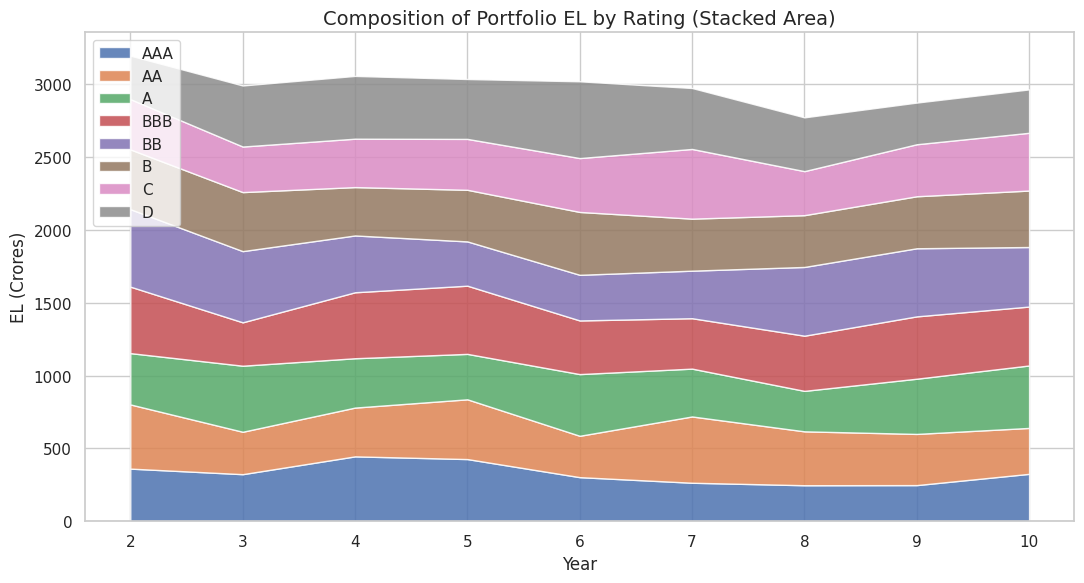

In [ ]:
plt.figure(figsize=(11,6))
plt.stackplot(el_df.index, el_df.T, labels=el_df.columns, alpha=0.85)
plt.title("Composition of Portfolio EL by Rating (Stacked Area)", fontsize=14)
plt.ylabel("EL (Crores)")
plt.xlabel("Year")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#SECTION 3 :-

In [ ]:
years = list(portfolio_pds.keys())
pd_values = list(portfolio_pds.values())

In [ ]:
def cumulative_pd(pd_list):
    survival_prob = 1.0
    for pd in pd_list:
        survival_prob *= (1 - pd)
    return 1 - survival_prob

In [ ]:
# 5-year cumulative PD (Year 2–6)
cum_pd_5yr = cumulative_pd(pd_values[:5])

# 10-year cumulative PD (Year 2–10)
cum_pd_10yr = cumulative_pd(pd_values[:10])

In [ ]:
print(" Cumulative Probability of Default ")
print(f"At end of 5th year : {cum_pd_5yr:.4f} ({cum_pd_5yr*100:.2f}%)")
print(f"At end of 10th year: {cum_pd_10yr:.4f} ({cum_pd_10yr*100:.2f}%)")

 Cumulative Probability of Default 
At end of 5th year : 0.5039 (50.39%)
At end of 10th year: 0.7111 (71.11%)


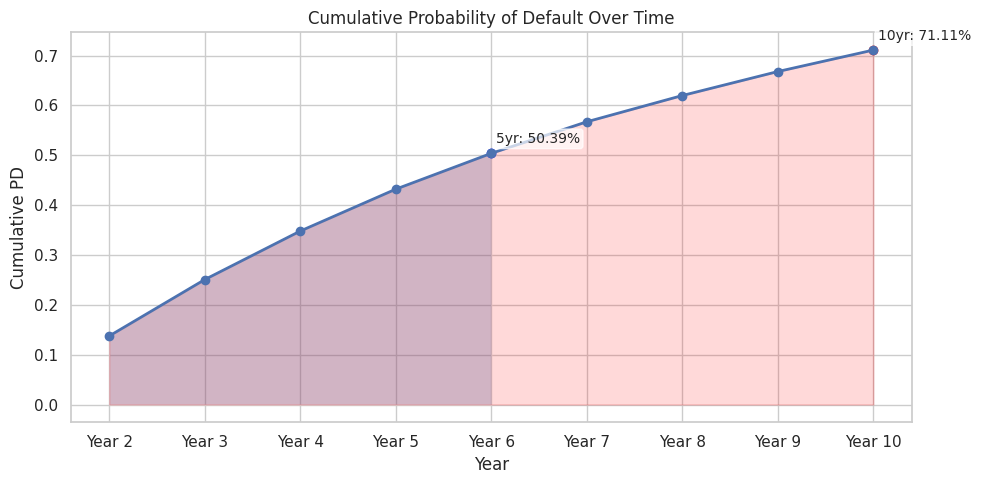

In [ ]:
cumulative_values = [cumulative_pd(pd_values[:i+1]) for i in range(len(pd_values))]

numerical_years = [int(year.split(' ')[1]) for year in years]
plt.figure(figsize=(10, 5))
plt.plot(numerical_years, cumulative_values, marker='o', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Cumulative PD")
plt.title("Cumulative Probability of Default Over Time")
plt.grid(True)


plt.fill_between(numerical_years[:5], cumulative_values[:5], alpha=0.3)

plt.fill_between(numerical_years, cumulative_values, alpha=0.15, color='red')

plt.scatter(numerical_years[4], cumulative_values[4], color='blue')
plt.text(
    numerical_years[4] + 0.05,
    cumulative_values[4] + 0.015,
    f"5yr: {cumulative_values[4]*100:.2f}%",
    ha='left',
    va='bottom',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7)
)

plt.scatter(numerical_years[-1], cumulative_values[-1], color='red')
plt.text(
    numerical_years[-1] + 0.05,
    cumulative_values[-1] + 0.015,
    f"10yr: {cumulative_values[-1]*100:.2f}%",
    ha='left',
    va='bottom',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7)
)

plt.xticks(numerical_years, years)
plt.tight_layout()
plt.show()

#SECTION 6 :-

SECTION 6 – Portfolio Risk Analytics (Count-Based)
----------------------------------------------------

AGGREGATE TRANSITION COUNTS (Total Loans Moving over 10 Years)


,AAA,AA,A,BBB,BB,B,C,D
AAA,283,274,286,291,291,262,295,246
AA,276,288,313,326,261,256,272,284
A,288,289,270,286,276,298,268,287
BBB,295,307,280,275,264,299,289,306
BB,294,265,274,272,276,241,263,317
B,267,281,279,293,253,281,259,300
C,261,282,259,269,283,256,324,281
D,259,279,277,300,284,310,282,298



----------------------------------------------------
PART (a) – MOST STABLE RATING CATEGORY
----------------------------------------------------
Most Stable Rating: **C**
Retention Probability: 14.63%


,Rating,Stability_Index
6,C,14.63%
7,D,13.02%
0,AAA,12.70%
5,B,12.70%
1,AA,12.65%
4,BB,12.53%
2,A,11.94%
3,BBB,11.88%


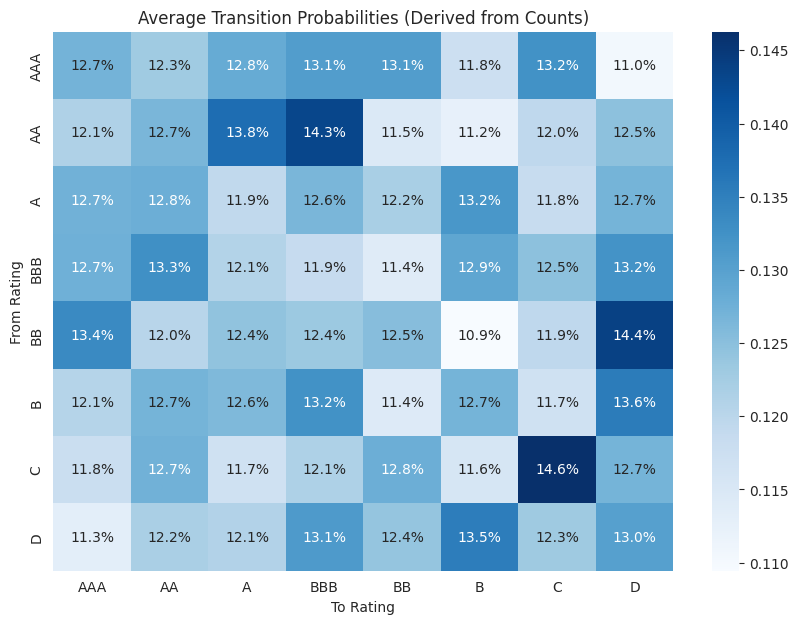


----------------------------------------------------
PART (b) – PORTFOLIO DRIFT (By Number of Loans)
----------------------------------------------------
Total Downgrades (Count): 7,891
Total Upgrades (Count):   7,814
Net Drift Volume:         15,705 loans moved rating
Downgrade/Upgrade Ratio:  1.01x
Conclusion: **Neutral / Stable Portfolio** (Upgrades approx. equal Downgrades).


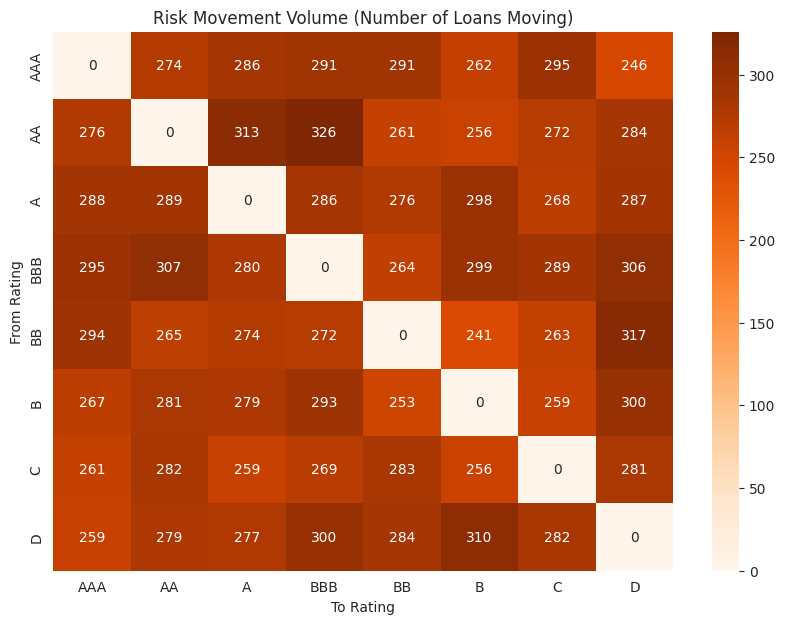

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

print("SECTION 6 – Portfolio Risk Analytics (Count-Based)")
print("----------------------------------------------------")

rating_labels = ['AAA','AA','A','BBB','BB','B','C','D']


total_counts = pd.DataFrame(0, index=rating_labels, columns=rating_labels)

for year in range(1, 10):
    col_from = f"Year_{year}_Ratings"
    col_to   = f"Year_{year+1}_Ratings"

    ct = pd.crosstab(df[col_from], df[col_to])

    ct = ct.reindex(index=rating_labels, columns=rating_labels, fill_value=0)

    total_counts += ct

print("\nAGGREGATE TRANSITION COUNTS (Total Loans Moving over 10 Years)")
display(total_counts)

row_totals = total_counts.sum(axis=1)
prob_matrix = total_counts.div(row_totals, axis=0).fillna(0)

stability_scores = np.diag(prob_matrix.values)

stability_df = pd.DataFrame({
    "Rating": rating_labels,
    "Stability_Index": stability_scores
}).sort_values("Stability_Index", ascending=False)

most_stable_rating = stability_df.iloc[0]

print("\n----------------------------------------------------")
print("PART (a) – MOST STABLE RATING CATEGORY")
print("----------------------------------------------------")
print(f"Most Stable Rating: **{most_stable_rating['Rating']}**")
print(f"Retention Probability: {most_stable_rating['Stability_Index']:.2%}")

display(stability_df.style.format({"Stability_Index": "{:.2%}"}))

plt.figure(figsize=(10,7))
sns.heatmap(prob_matrix, annot=True, fmt=".1%", cmap="Blues")
plt.title("Average Transition Probabilities (Derived from Counts)")
plt.ylabel("From Rating")
plt.xlabel("To Rating")
plt.show()

# Upper Triangle (k=1) = Downgrades (Count of loans moving right)
downgrades_count = np.triu(total_counts.values, k=1).sum()

# Lower Triangle (k=-1) = Upgrades (Count of loans moving left)
upgrades_count   = np.tril(total_counts.values, k=-1).sum()

# Total Drift Volume
total_drift = downgrades_count + upgrades_count
ratio = downgrades_count / upgrades_count if upgrades_count > 0 else np.inf

print("\n----------------------------------------------------")
print("PART (b) – PORTFOLIO DRIFT (By Number of Loans)")
print("----------------------------------------------------")
print(f"Total Downgrades (Count): {downgrades_count:,.0f}")
print(f"Total Upgrades (Count):   {upgrades_count:,.0f}")
print(f"Net Drift Volume:         {total_drift:,.0f} loans moved rating")
print(f"Downgrade/Upgrade Ratio:  {ratio:.2f}x")

if ratio > 1.10:
    print("Conclusion: **Negative Shift** (More loans are downgrading than upgrading).")
elif ratio < 0.90:
    print("Conclusion: **Positive Shift** (More loans are upgrading than downgrading).")
else:
    print("Conclusion: **Neutral / Stable Portfolio** (Upgrades approx. equal Downgrades).")


plt.figure(figsize=(10,7))


movement_counts = total_counts - np.diag(np.diag(total_counts))

sns.heatmap(movement_counts, annot=True, fmt=".0f", cmap="Oranges")

plt.title("Risk Movement Volume (Number of Loans Moving)")
plt.ylabel("From Rating")
plt.xlabel("To Rating")
plt.show()

#SEC 5

=== Stress Test Results (Scenario I) ===


,Normal_EL,Stressed_EL,Factor_Used,Increase_Amount,Increase_Pct
Year 2,"3,196.99","4,132.08",1.39,935.09,29.25%
Year 3,"2,991.99","4,163.95",1.43,"1,171.96",39.17%
Year 4,"3,057.62","3,974.29",1.40,916.66,29.98%
Year 5,"3,036.47","4,177.86",1.45,"1,141.40",37.59%
Year 6,"3,020.75","4,000.58",1.42,979.83,32.44%
Year 7,"2,974.73","3,711.92",1.23,737.18,24.78%
Year 8,"2,773.16","3,524.75",1.26,751.59,27.10%
Year 9,"2,874.65","3,493.89",1.22,619.25,21.54%
Year 10,"2,965.05","3,707.72",1.28,742.67,25.05%


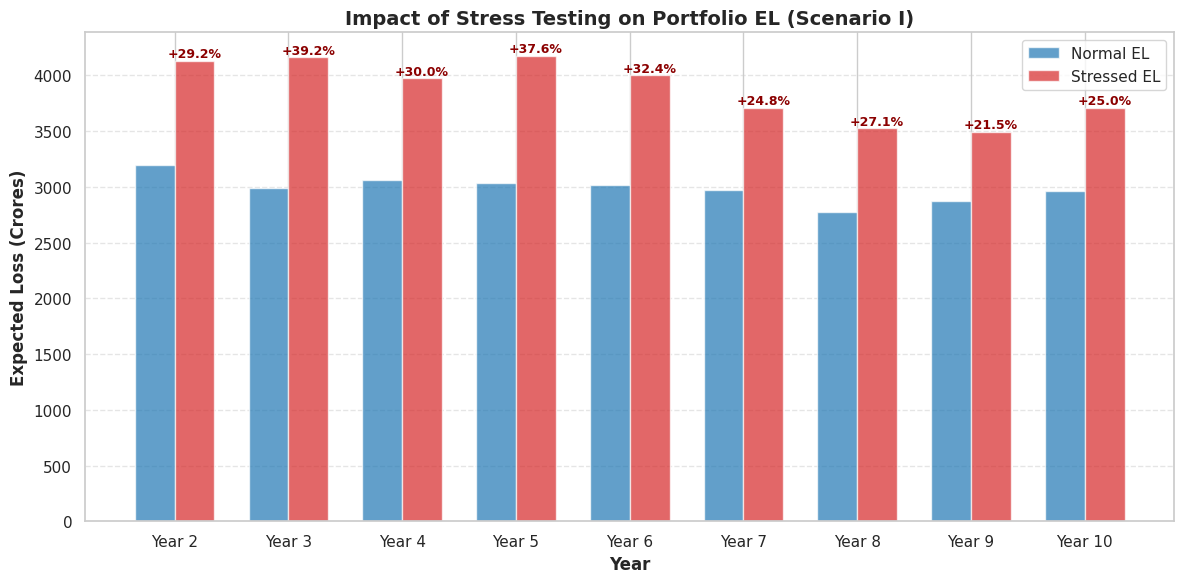


=== OBSERVATIONS ===
1. Under Scenario I, the Portfolio Expected Loss increases significantly across all years.
2. The average increase in Expected Loss over the period is approximately 29.66%
3. The stress factors were capped at 100% LGD, preventing the loss from exceeding the total exposure for any single loan.
4. The highest relative impact was observed in Year 3, driven by the high stress factor and the underlying portfolio composition.


In [ ]:
stress_factors = {
    1: 1.39,
    2: 1.43,
    3: 1.40,
    4: 1.45,
    5: 1.42,
    6: 1.23,
    7: 1.26,
    8: 1.22,
    9: 1.28,
    10: 1.20
}

stress_results = {}

original_lgd_df = df[[f"Year_{i}_LGD" for i in range(1, 11)]].copy()



for i in range(1, 10):
    year_label = f"Year {i+1}"


    col_rating = f"Year_{i}_Ratings"
    col_lgd    = f"Year_{i}_LGD"
    col_ead    = f"Year_{i}_EAD"
    col_amt    = f"Year_{i}_Amount"


    pd_per_rating = pd_results[year_label]["pd_per_rating"]

    borrower_pd = ratings_df[col_rating].map(pd_per_rating).fillna(0)

    ead_value = amount_df[col_amt] * ead_df[col_ead]

    factor = stress_factors[i]
    stressed_lgd = original_lgd_df[col_lgd] * factor
    stressed_lgd = stressed_lgd.clip(upper=1.0)

    stressed_borrower_el = borrower_pd * stressed_lgd * ead_value

    stressed_portfolio_el = stressed_borrower_el.sum()

    normal_el = el_results[year_label]["portfolio_el"]

    stress_results[year_label] = {
        "Normal_EL": normal_el,
        "Stressed_EL": stressed_portfolio_el,
        "Factor_Used": factor,
        "Increase_Amount": stressed_portfolio_el - normal_el,
        "Increase_Pct": ((stressed_portfolio_el - normal_el) / normal_el) * 100
    }

stress_df = pd.DataFrame(stress_results).T

print("=== Stress Test Results (Scenario I) ===")
display(stress_df.style.format({
    "Normal_EL": "{:,.2f}",
    "Stressed_EL": "{:,.2f}",
    "Factor_Used": "{:.2f}",
    "Increase_Amount": "{:,.2f}",
    "Increase_Pct": "{:.2f}%"
}))

plt.figure(figsize=(12, 6))

years_idx = range(len(stress_df))
bar_width = 0.35

plt.bar(years_idx, stress_df["Normal_EL"], width=bar_width,
        label='Normal EL', color='tab:blue', alpha=0.7)

plt.bar([x + bar_width for x in years_idx], stress_df["Stressed_EL"], width=bar_width,
        label='Stressed EL', color='tab:red', alpha=0.7)

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Expected Loss (Crores)', fontweight='bold')
plt.title('Impact of Stress Testing on Portfolio EL (Scenario I)', fontsize=14, fontweight='bold')
plt.xticks([x + bar_width / 2 for x in years_idx], stress_df.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)


for i, (idx, row) in enumerate(stress_df.iterrows()):
    plt.text(i + bar_width, row["Stressed_EL"] + 5,
             f"+{row['Increase_Pct']:.1f}%",
             ha='center', va='bottom', fontsize=9, color='darkred', fontweight='bold')

plt.tight_layout()
plt.show()


print("\n=== OBSERVATIONS ===")
avg_increase = stress_df["Increase_Pct"].mean()
max_impact_year = stress_df["Increase_Pct"].idxmax()
print(f"1. Under Scenario I, the Portfolio Expected Loss increases significantly across all years.")
print(f"2. The average increase in Expected Loss over the period is approximately {avg_increase:.2f}%")
print(f"3. The stress factors were capped at 100% LGD, preventing the loss from exceeding the total exposure for any single loan.")
print(f"4. The highest relative impact was observed in {max_impact_year}, driven by the high stress factor and the underlying portfolio composition.")

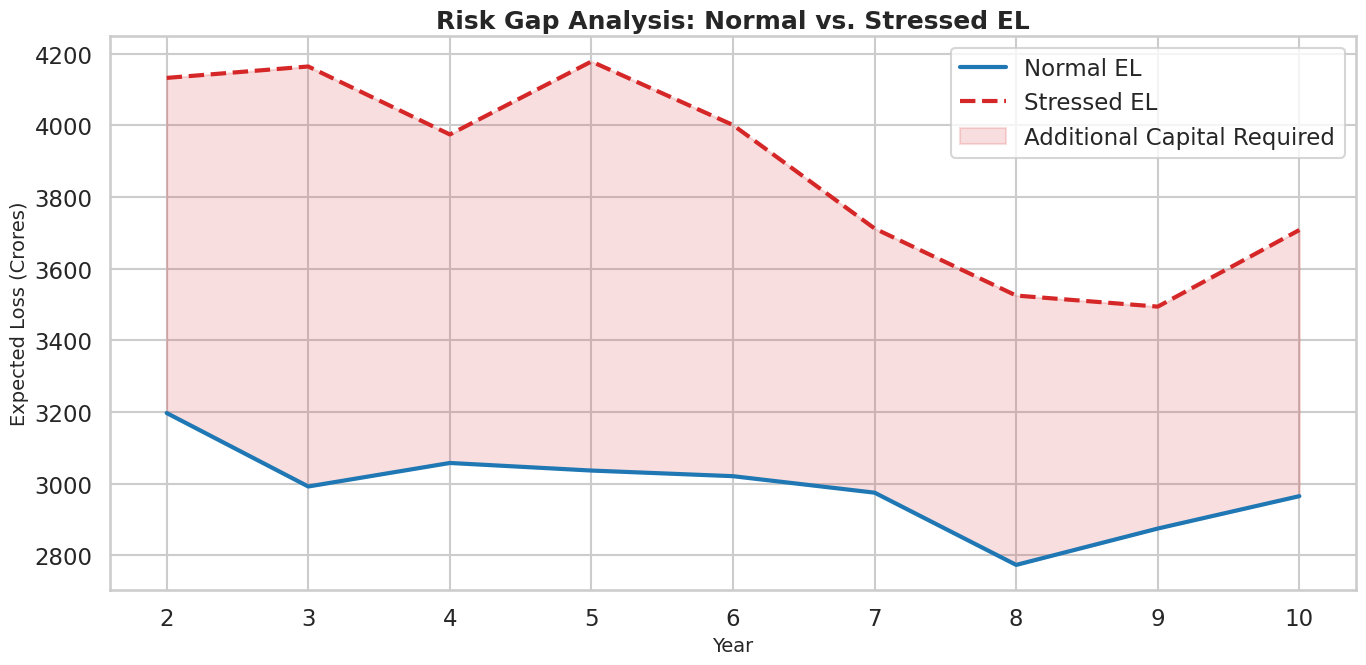

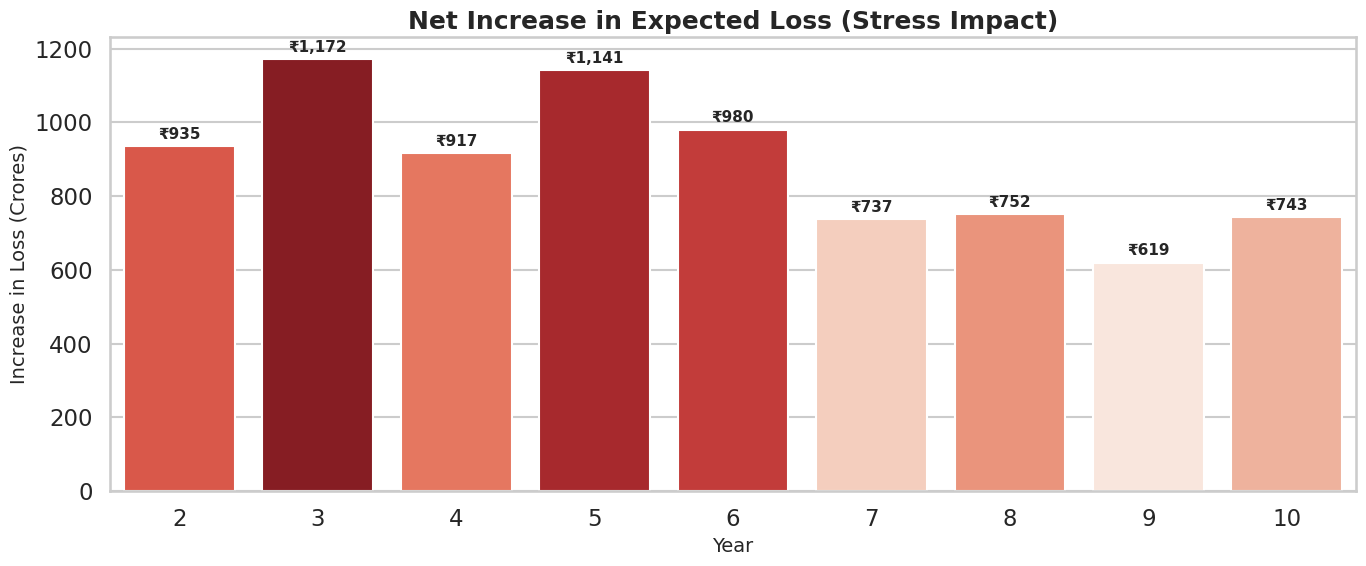

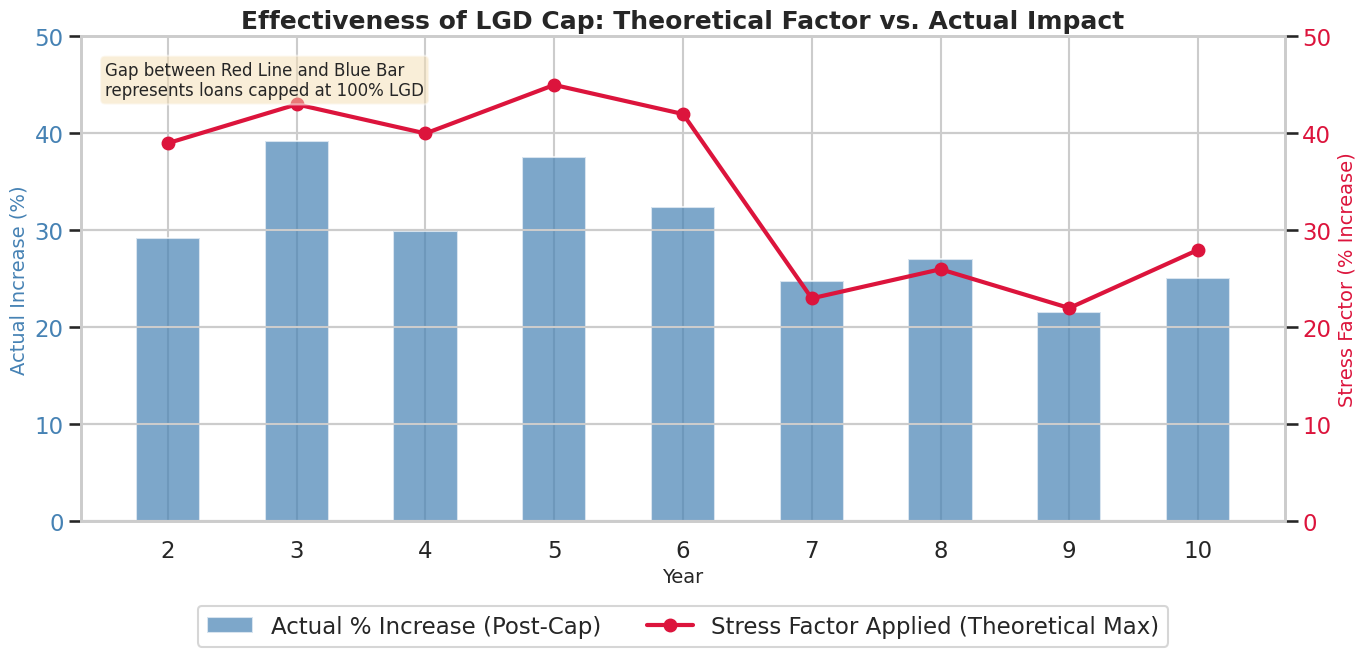

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

sns.set(style="whitegrid", context="talk")

years_num = [int(y.split(' ')[1]) for y in stress_df.index]

plt.figure(figsize=(14, 7))

plt.plot(years_num, stress_df["Normal_EL"], color="tab:blue", label="Normal EL", linewidth=3)

plt.plot(years_num, stress_df["Stressed_EL"], color="tab:red", label="Stressed EL", linewidth=3, linestyle="--")

plt.fill_between(years_num, stress_df["Normal_EL"], stress_df["Stressed_EL"],
                 color="tab:red", alpha=0.15, label="Additional Capital Required")

plt.title("Risk Gap Analysis: Normal vs. Stressed EL", fontsize=18, weight='bold')
plt.ylabel("Expected Loss (Crores)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.legend(loc='upper right')
plt.xticks(years_num)

max_gap_idx = stress_df['Increase_Amount'].idxmax()
max_gap_val = stress_df['Increase_Amount'].max()
year_num_max = int(max_gap_idx.split(' ')[1])

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

pal = sns.color_palette("Reds", len(stress_df))
rank = stress_df["Increase_Amount"].argsort().argsort()

ax = sns.barplot(x=years_num, y=stress_df["Increase_Amount"], hue=years_num, palette=np.array(pal)[rank].tolist(), legend=False)

plt.title("Net Increase in Expected Loss (Stress Impact)", fontsize=18, weight='bold')
plt.ylabel("Increase in Loss (Crores)", fontsize=14)
plt.xlabel("Year", fontsize=14)

for i, v in enumerate(stress_df["Increase_Amount"]):
    ax.text(i, v + 20, f"₹{v:,.0f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


fig, ax1 = plt.subplots(figsize=(14, 7))

theoretical_increase = (stress_df["Factor_Used"] - 1) * 100
actual_increase = stress_df["Increase_Pct"]

bars = ax1.bar(years_num, actual_increase, color='steelblue', label='Actual % Increase (Post-Cap)', alpha=0.7, width=0.5)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Actual Increase (%)', color='steelblue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_ylim(0, 50)

ax2 = ax1.twinx()
line = ax2.plot(years_num, theoretical_increase, color='crimson', marker='o', linewidth=3, label='Stress Factor Applied (Theoretical Max)')
ax2.set_ylabel('Stress Factor (% Increase)', color='crimson', fontsize=14)
ax2.tick_params(axis='y', labelcolor='crimson')
ax2.set_ylim(0, 50)


plt.title("Effectiveness of LGD Cap: Theoretical Factor vs. Actual Impact", fontsize=18, weight='bold')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)


text_str = "Gap between Red Line and Blue Bar\nrepresents loans capped at 100% LGD"
plt.text(0.02, 0.95, text_str, transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.xticks(years_num)
plt.show()

SECTION 5 (Part B) – RATING SLIP STRESS TEST (CORRECTED)
Baseline Year 10 EL:        ₹ 2,965.05 Cr
Stressed Year 10 EL (Slip): ₹ 10,438.55 Cr
------------------------------------------------------------
Increase in Loss:           ₹ 7,473.50 Cr
% Increase:                 252.05%


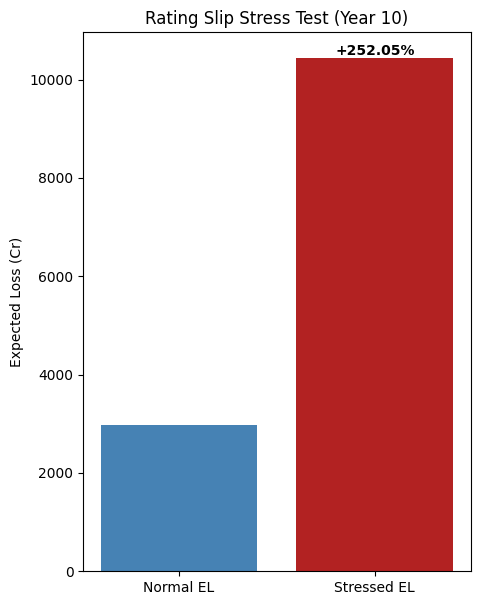

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("================================================================")
print("SECTION 5 (Part B) – RATING SLIP STRESS TEST (CORRECTED)")
print("================================================================")


rating_slip_map = {
    'AAA': 'A', 'AA': 'BBB', 'A': 'BB', 'BBB': 'C',
    'BB': 'C', 'B': 'D', 'C': 'D', 'D': 'D'
}


pd_vec_y10 = calculate_pd_vector(df, 9, 10)


rating_y9  = df["Year_9_Ratings"]        # PD mapping uses Year 9 ratings
lgd_y10    = df["Year_10_LGD"]           # CORRECT
ead_y10    = df["Year_10_EAD"]           # CORRECT
amt_y10    = df["Year_10_Amount"]        # CORRECT

exposure_y10 = amt_y10 * ead_y10         # CORRECT EXPOSURE

# ------------------------------------------------------------
# 4. BASELINE (Normal) EL for Year 10
# ------------------------------------------------------------
normal_pds = rating_y9.map(pd_vec_y10).fillna(0)
normal_el_y10 = (normal_pds * lgd_y10 * exposure_y10).sum()

# ------------------------------------------------------------
# 5. STRESSED (Rating Slip) EL
# ------------------------------------------------------------

# A. Slip the ratings of Year 9
slipped_ratings = rating_y9.map(rating_slip_map)

# B. Map PDs normally
stressed_pds = slipped_ratings.map(pd_vec_y10)

# C. FIX: Make PD = 1 for all who slipped to 'D'
stressed_pds = pd.Series(
    np.where(slipped_ratings == 'D', 1.0, stressed_pds),
    index=rating_y9.index
).fillna(0)

# D. Stressed EL using Year 10 LGD/EAD/Amount
stressed_el_y10 = (stressed_pds * lgd_y10 * exposure_y10).sum()

# ------------------------------------------------------------
# 6. Final Results
# ------------------------------------------------------------
increase_amt = stressed_el_y10 - normal_el_y10
increase_pct = (increase_amt / normal_el_y10) * 100

print(f"Baseline Year 10 EL:        ₹ {normal_el_y10:,.2f} Cr")
print(f"Stressed Year 10 EL (Slip): ₹ {stressed_el_y10:,.2f} Cr")
print("------------------------------------------------------------")
print(f"Increase in Loss:           ₹ {increase_amt:,.2f} Cr")
print(f"% Increase:                 {increase_pct:.2f}%")

# ------------------------------------------------------------
# 7. Plot
# ------------------------------------------------------------
plt.figure(figsize=(5,7))
plt.bar(['Normal EL', 'Stressed EL'], [normal_el_y10, stressed_el_y10],
        color=['steelblue', 'firebrick'])

plt.title("Rating Slip Stress Test (Year 10)")
plt.ylabel("Expected Loss (Cr)")
plt.text(1, stressed_el_y10, f"+{increase_pct:.2f}%",
         ha='center', va='bottom', fontweight='bold')

plt.show()

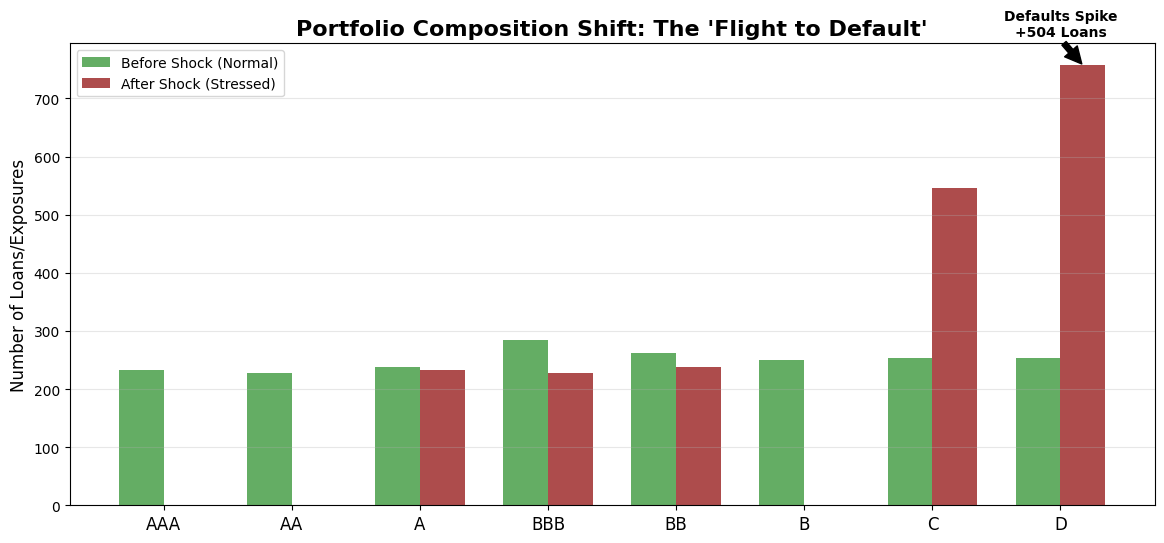

/tmp/ipython-input-1781454128.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attr_summary.index, y=attr_summary['Increase'], palette='Reds')


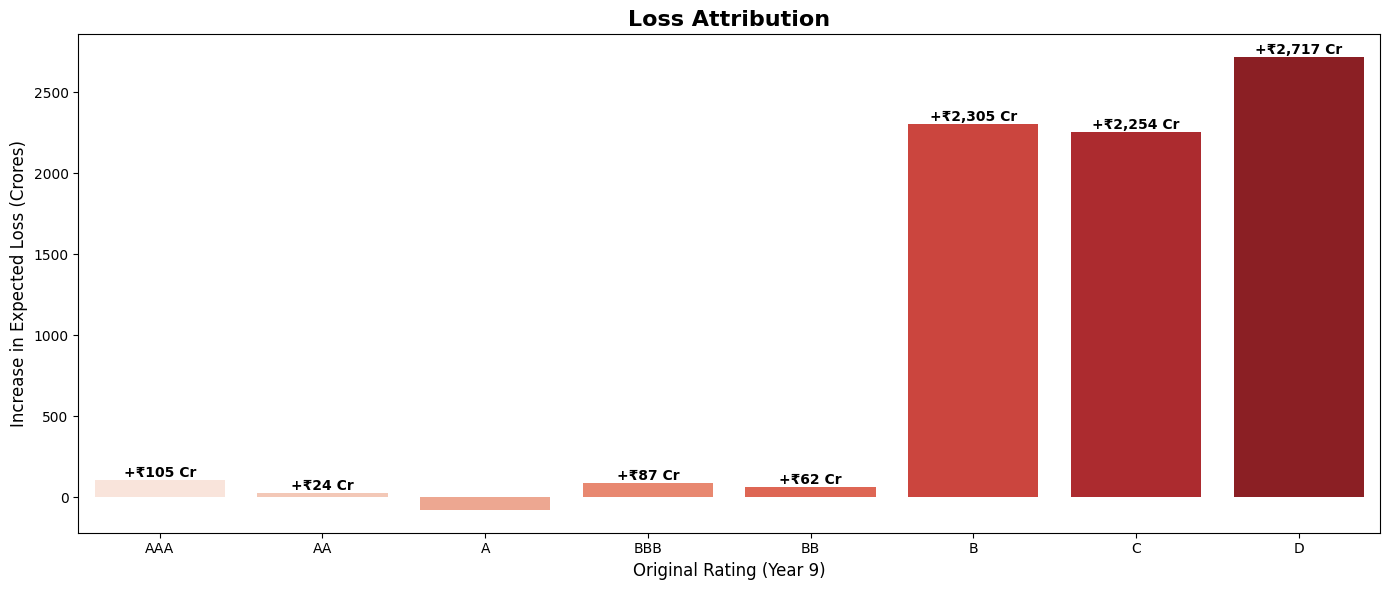


=== ANALYTICAL INSIGHTS ===
1. Risk Profile Deterioration:
   - Average Portfolio PD (Normal):   13.00%
   - Average Portfolio PD (Stressed): 46.73%
   - The average probability of default increased by 259.5%.

2. The 'Toxic' Segment:
   - The rating category 'D' contributed the most to the loss increase.
   - This is because these loans downgraded into a much higher risk bucket (likely Default or C).

3. Default Realization:
   - Immediate Defaults rose from 253 to 757.
   - This mapping forces immediate recognition of losses for lower-rated assets.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("data.xlsx")

valid_ratings = ['AAA','AA','A','BBB','BB','B','C','D']

def calculate_pd_vector(df, year_from, year_to):
    col_from = f"Year_{year_from}_Ratings"
    col_to   = f"Year_{year_to}_Ratings"

    tm = pd.crosstab(df[col_from], df[col_to], normalize='index')

    for r in valid_ratings:
        if r not in tm.index:
            tm.loc[r] = 0
        if r not in tm.columns:
            tm[r] = 0

    tm = tm.sort_index().sort_index(axis=1)
    return tm["D"].copy()

rating_slip_map = {
    'AAA': 'A', 'AA': 'BBB', 'A': 'BB', 'BBB': 'C',
    'BB': 'C', 'B': 'D', 'C': 'D', 'D': 'D'
}

pd_vec_y10 = calculate_pd_vector(df, 9, 10)

rating_y9  = df["Year_9_Ratings"]
lgd_y10    = df["Year_10_LGD"]
ead_y10    = df["Year_10_EAD"]
amt_y10    = df["Year_10_Amount"]

exposure_y10 = amt_y10 * ead_y10

normal_pds = rating_y9.map(pd_vec_y10).fillna(0)

slipped_ratings = rating_y9.map(rating_slip_map)

stressed_pds = slipped_ratings.map(pd_vec_y10)

stressed_pds = pd.Series(
    np.where(slipped_ratings == 'D', 1.0, stressed_pds),
    index=rating_y9.index
).fillna(0)

dist_normal = rating_y9.value_counts().reindex(rating_slip_map.keys()).fillna(0)
dist_stressed = slipped_ratings.value_counts().reindex(rating_slip_map.keys()).fillna(0)

comp_df = pd.DataFrame({
    'Normal Count': dist_normal,
    'Stressed Count': dist_stressed
})

plt.figure(figsize=(14, 6))
x_indexes = np.arange(len(comp_df))
width = 0.35

plt.bar(x_indexes - width/2, comp_df['Normal Count'], width=width, label='Before Shock (Normal)', color='forestgreen', alpha=0.7)
plt.bar(x_indexes + width/2, comp_df['Stressed Count'], width=width, label='After Shock (Stressed)', color='darkred', alpha=0.7)

plt.xticks(ticks=x_indexes, labels=comp_df.index, fontsize=12)
plt.ylabel("Number of Loans/Exposures", fontsize=12)
plt.title("Portfolio Composition Shift: The 'Flight to Default'", fontsize=16, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

d_increase = comp_df.loc['D', 'Stressed Count'] - comp_df.loc['D', 'Normal Count']
plt.annotate(f'Defaults Spike\n+{int(d_increase)} Loans',
             xy=(7 + width/2, comp_df.loc['D', 'Stressed Count']),
             xytext=(7, comp_df.loc['D', 'Stressed Count'] + 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center', fontweight='bold')

plt.show()

attribution_df = pd.DataFrame({
    'Original_Rating': rating_y9,
    'Normal_EL': normal_pds * lgd_y10 * exposure_y10,
    'Row_Stressed_EL': stressed_pds * lgd_y10 * exposure_y10
})

attr_summary = attribution_df.groupby('Original_Rating')[['Normal_EL', 'Row_Stressed_EL']].sum()
attr_summary['Increase'] = attr_summary['Row_Stressed_EL'] - attr_summary['Normal_EL']
attr_summary = attr_summary.reindex(['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C', 'D']).fillna(0)

plt.figure(figsize=(14, 6))
sns.barplot(x=attr_summary.index, y=attr_summary['Increase'], hue=attr_summary.index, palette='Reds', legend=False)

plt.title("Loss Attribution", fontsize=16, fontweight='bold')
plt.ylabel("Increase in Expected Loss (Crores)", fontsize=12)
plt.xlabel("Original Rating (Year 9)", fontsize=12)

for i, v in enumerate(attr_summary['Increase']):
    if v > 1:
        plt.text(i, v, f"+₹{v:,.0f} Cr", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

avg_pd_normal = normal_pds.mean()
avg_pd_stressed = stressed_pds.mean()

print("\n=== ANALYTICAL INSIGHTS ===")
print(f"1. Risk Profile Deterioration:")
print(f"   - Average Portfolio PD (Normal):   {avg_pd_normal:.2%}")
print(f"   - Average Portfolio PD (Stressed): {avg_pd_stressed:.2%}")
print(f"   - The average probability of default increased by {((avg_pd_stressed/avg_pd_normal)-1)*100:.1f}%.")

top_culprit = attr_summary['Increase'].idxmax()
print(f"\n2. The 'Toxic' Segment:")
print(f"   - The rating category '{top_culprit}' contributed the most to the loss increase.")
print(f"   - This is because these loans downgraded into a much higher risk bucket (likely Default or C).")

defaults_before = comp_df.loc['D', 'Normal Count']
defaults_after = comp_df.loc['D', 'Stressed Count']
print(f"\n3. Default Realization:")
print(f"   - Immediate Defaults rose from {int(defaults_before)} to {int(defaults_after)}.")
print(f"   - This mapping forces immediate recognition of losses for lower-rated assets.")

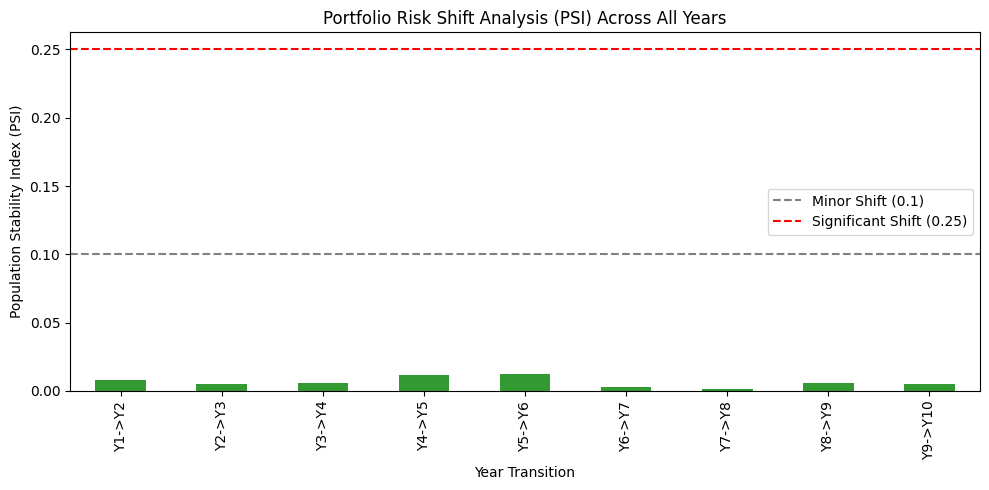

=== SIGNIFICANT SHIFTS DETECTED ===
Y1->Y2: 0.0077 [STABLE]
Y2->Y3: 0.0050 [STABLE]
Y3->Y4: 0.0061 [STABLE]
Y4->Y5: 0.0114 [STABLE]
Y5->Y6: 0.0127 [STABLE]
Y6->Y7: 0.0027 [STABLE]
Y7->Y8: 0.0016 [STABLE]
Y8->Y9: 0.0060 [STABLE]
Y9->Y10: 0.0053 [STABLE]
=== CHI-SQUARE SHIFT ANALYSIS ===


,Chi2_Stat,P_Value,Significant
Y1 -> Y2,15.82,2.6812e-02,True
Y2 -> Y3,10.18,1.7879e-01,False
Y3 -> Y4,12.34,8.9896e-02,False
Y4 -> Y5,22.54,2.0458e-03,True
Y5 -> Y6,25.42,6.3917e-04,True
Y6 -> Y7,5.49,6.0024e-01,False
Y7 -> Y8,3.18,8.6793e-01,False
Y8 -> Y9,11.91,1.0345e-01,False
Y9 -> Y10,10.32,1.7105e-01,False


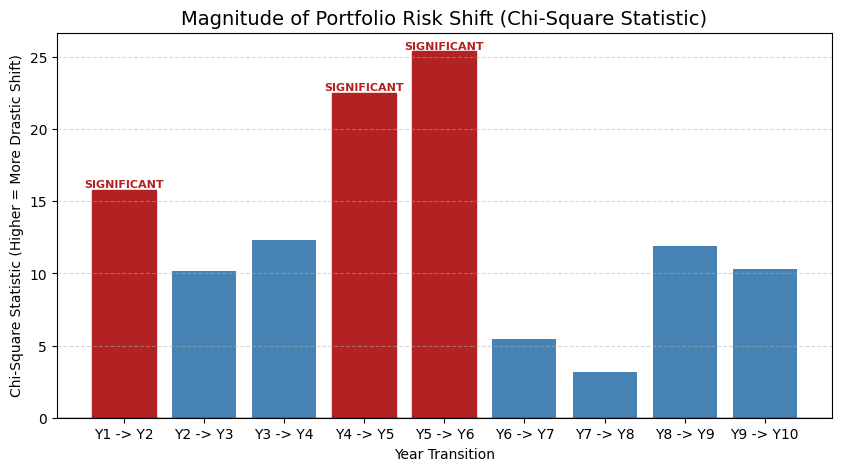

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_psi(expected, observed):
    """Helper function to calculate PSI for two series."""
    # Align and fill missing categories with 0
    counts_e = expected.value_counts(normalize=True).sort_index()
    counts_o = observed.value_counts(normalize=True).sort_index()

    # Merge to ensure same index
    df_psi = pd.concat([counts_e, counts_o], axis=1, keys=['E', 'O']).fillna(0)

    # Add epsilon to avoid divide by zero
    epsilon = 1e-10
    df_psi = df_psi + epsilon

    # PSI Formula
    psi_values = (df_psi['O'] - df_psi['E']) * np.log(df_psi['O'] / df_psi['E'])
    return psi_values.sum()

# ---------------------------------------------------------
# LOOP THROUGH ALL YEARS (Year 1 -> 2, Year 2 -> 3...)
# ---------------------------------------------------------
psi_results = {}

# Assuming columns are named "Year_1_Ratings", "Year_2_Ratings", etc.
for i in range(1, 10):
    col_prev = f"Year_{i}_Ratings"
    col_curr = f"Year_{i+1}_Ratings"

    # Calculate PSI for this transition
    psi_score = calculate_psi(df[col_prev], df[col_curr])

    label = f"Y{i}->Y{i+1}"
    psi_results[label] = psi_score

# ---------------------------------------------------------
# VISUALIZE THE SHIFT
# ---------------------------------------------------------
psi_df = pd.Series(psi_results)

plt.figure(figsize=(10, 5))
# Color bars: Green (Safe), Orange (Warning), Red (Significant Shift)
colors = ['green' if x < 0.1 else 'orange' if x < 0.25 else 'red' for x in psi_df.values]

psi_df.plot(kind='bar', color=colors, alpha=0.8)

# Add thresholds lines
plt.axhline(y=0.1, color='gray', linestyle='--', label='Minor Shift (0.1)')
plt.axhline(y=0.25, color='red', linestyle='--', label='Significant Shift (0.25)')

plt.title("Portfolio Risk Shift Analysis (PSI) Across All Years")
plt.ylabel("Population Stability Index (PSI)")
plt.xlabel("Year Transition")
plt.legend()
plt.tight_layout()
plt.show()

# Print Numerical Analysis
print("=== SIGNIFICANT SHIFTS DETECTED ===")
for period, score in psi_results.items():
    status = "STABLE"
    if score > 0.25: status = "CRITICAL SHIFT"
    elif score > 0.1: status = "MODERATE SHIFT"

    print(f"{period}: {score:.4f} [{status}]")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

def run_chisquare_trend(df):
    results = {}

    for i in range(1, 10):
        col_prev = f"Year_{i}_Ratings"
        col_curr = f"Year_{i+1}_Ratings"
        label = f"Y{i} -> Y{i+1}"


        counts_exp = df[col_prev].value_counts().rename("Expected")
        counts_obs = df[col_curr].value_counts().rename("Observed")

        data = pd.concat([counts_exp, counts_obs], axis=1).fillna(0)

        data = data + 1e-5

        total_obs = data["Observed"].sum()
        total_exp = data["Expected"].sum()
        data["Expected_Scaled"] = data["Expected"] * (total_obs / total_exp)


        chi2_stat, p_value = chisquare(f_obs=data["Observed"], f_exp=data["Expected_Scaled"])

        results[label] = {
            "Chi2_Stat": chi2_stat,
            "P_Value": p_value,
            "Significant": p_value < 0.05
        }

    return pd.DataFrame(results).T


chi_results = run_chisquare_trend(df)


print("=== CHI-SQUARE SHIFT ANALYSIS ===")
display(chi_results.style.format({
    "Chi2_Stat": "{:.2f}",
    "P_Value": "{:.4e}"
}))

plt.figure(figsize=(10, 5))


bars = plt.bar(chi_results.index, chi_results["Chi2_Stat"], color='steelblue')

for i, (idx, row) in enumerate(chi_results.iterrows()):
    if row["Significant"]:
        bars[i].set_color('firebrick')
        plt.text(i, row["Chi2_Stat"], "SIGNIFICANT",
                 ha='center', va='bottom', fontsize=8, color='firebrick', fontweight='bold')

plt.axhline(y=0, color='black', linewidth=1)
plt.title("Magnitude of Portfolio Risk Shift (Chi-Square Statistic)", fontsize=14)
plt.ylabel("Chi-Square Statistic (Higher = More Drastic Shift)")
plt.xlabel("Year Transition")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


=== 10-YEAR NET NOTCH DRIFT ANALYSIS ===


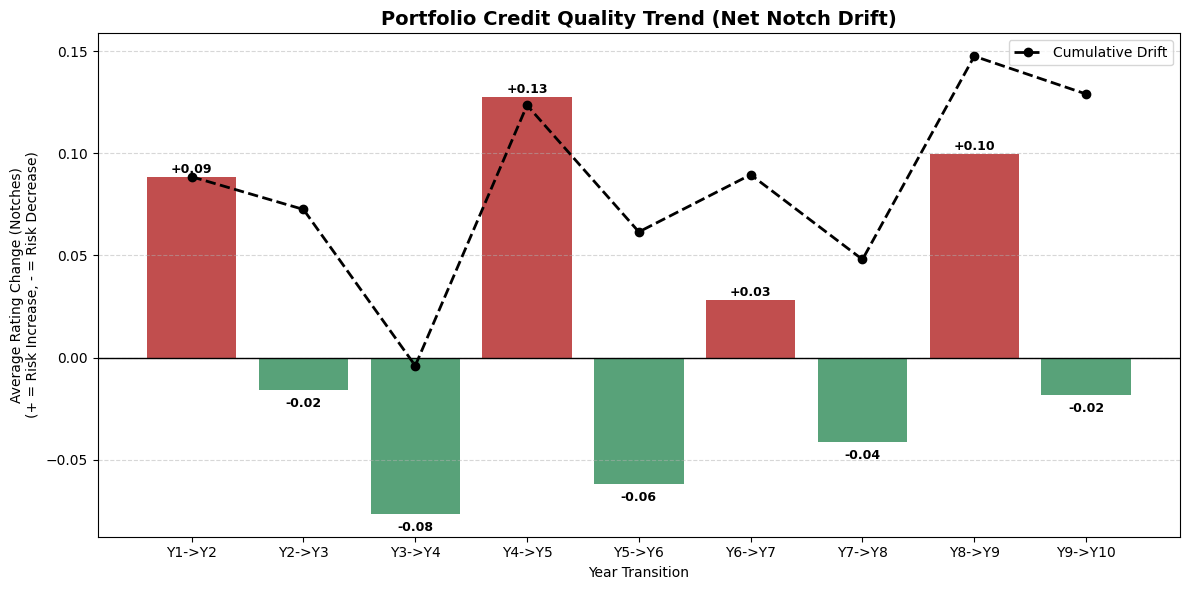

,Avg_Drift,Volatility
Y1->Y2,0.0885,3.205902
Y2->Y3,-0.0160,3.226600
Y3->Y4,-0.0765,3.236956
Y4->Y5,0.1275,3.239366
Y5->Y6,-0.0620,3.239970
Y6->Y7,0.0280,3.181710
Y7->Y8,-0.0415,3.193255
Y8->Y9,0.0995,3.207451
Y9->Y10,-0.0185,3.180443


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rating_scale = {
    'AAA': 1, 'AA': 2, 'A': 3, 'BBB': 4,
    'BB': 5, 'B': 6, 'C': 7, 'D': 8
}

def analyze_drift_trend(df):
    results = {}

    print("=== 10-YEAR NET NOTCH DRIFT ANALYSIS ===")

    for i in range(1, 10):
        col_prev = f"Year_{i}_Ratings"
        col_curr = f"Year_{i+1}_Ratings"
        label = f"Y{i}->Y{i+1}"


        score_prev = df[col_prev].map(rating_scale)
        score_curr = df[col_curr].map(rating_scale)

        # Calculate Drift (Positive = Deterioration)
        drift = score_curr - score_prev

        results[label] = {
            "Avg_Drift": drift.mean(),
            "Volatility": drift.std()
        }

    # Convert to DataFrame
    trend_df = pd.DataFrame(results).T

    plt.figure(figsize=(12, 6))

    # Color Logic: Red for Deterioration (+), Green for Improvement (-)
    colors = ['firebrick' if x > 0 else 'seagreen' for x in trend_df["Avg_Drift"]]

    # Plot Bar Chart
    bars = plt.bar(trend_df.index, trend_df["Avg_Drift"], color=colors, alpha=0.8)

    # Add a Cumulative Line (To show total damage over time)
    # We multiply by 5 to make it visible on the same scale (or use secondary axis)
    cumulative_drift = trend_df["Avg_Drift"].cumsum()
    plt.plot(trend_df.index, cumulative_drift, color='black', marker='o', linestyle='--', linewidth=2, label='Cumulative Drift')

    plt.axhline(0, color='black', linewidth=1)
    plt.title("Portfolio Credit Quality Trend (Net Notch Drift)", fontsize=14, fontweight='bold')
    plt.ylabel("Average Rating Change (Notches)\n(+ = Risk Increase, - = Risk Decrease)")
    plt.xlabel("Year Transition")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Add labels on bars
    for bar in bars:
        height = bar.get_height()
        xy_pos = (bar.get_x() + bar.get_width() / 2, height)
        offset = (0, 3) if height > 0 else (0, -12)
        plt.annotate(f'{height:+.2f}', xy=xy_pos, xytext=offset,
                     textcoords="offset points", ha='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return trend_df

drift_trend = analyze_drift_trend(df)
display(drift_trend)